In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
import _pickle

import warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=ValueWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
# warnings.simplefilter(action="ignore", category=VisibleDeprecationWarning)

# Data prep

Read all files and concatenate

In [2]:
# path = "//Users//yagmurozdemir//Desktop//20180101_20231121_bist30"
path = "C://Users//Excalibur//ie423//hw2//20180101_20231121_bist30"
files = os.listdir(path)
files

['20180101_20180401_bist30.csv',
 '20180402_20180701_bist30.csv',
 '20180702_20180930_bist30.csv',
 '20181001_20181230_bist30.csv',
 '20181231_20190331_bist30.csv',
 '20190401_20190630_bist30.csv',
 '20190701_20190929_bist30.csv',
 '20190930_20191229_bist30.csv',
 '20191230_20200329_bist30.csv',
 '20200330_20200628_bist30.csv',
 '20200629_20200927_bist30.csv',
 '20200928_20201227_bist30.csv',
 '20201228_20210328_bist30.csv',
 '20210329_20210627_bist30.csv',
 '20210628_20210926_bist30.csv',
 '20210927_20211226_bist30.csv',
 '20211227_20220327_bist30.csv',
 '20220328_20220626_bist30.csv',
 '20220627_20220925_bist30.csv',
 '20220926_20221225_bist30.csv',
 '20221226_20230326_bist30.csv',
 '20230327_20230625_bist30.csv',
 '20230626_20230924_bist30.csv',
 '20230925_20231224_bist30.csv']

In [3]:
# import os
# print(os.getcwd())


In [ ]:
# os.chdir("/Users/yagmurozdemir/Desktop/")


In [4]:
dfs = [pd.read_csv(f'20180101_20231121_bist30/{filename}') for filename in files]

In [5]:
df = pd.concat(dfs)
df

timestamp  price short_name
0      2018-01-02 09:00:00+03:00  15.79      THYAO
1      2018-01-02 10:00:00+03:00  16.01      THYAO
2      2018-01-02 11:00:00+03:00  16.05      THYAO
3      2018-01-02 12:00:00+03:00  16.05      THYAO
4      2018-01-02 13:00:00+03:00  16.06      THYAO
...                          ...    ...        ...
12445  2023-11-21 09:00:00+03:00  17.16      YKBNK
12446  2023-11-21 10:00:00+03:00  17.07      YKBNK
12447  2023-11-21 11:00:00+03:00  17.04      YKBNK
12448  2023-11-21 12:00:00+03:00  17.05      YKBNK
12449  2023-11-21 13:00:00+03:00  16.99      YKBNK

[439132 rows x 3 columns]

Convert into wide format where each row is for one timestamp and prices for different stocks are stored in separate columns

In [6]:
df = pd.pivot(df, index='timestamp', columns='short_name', values='price')
df

short_name                   AKBNK     ARCLK    ASELS     BIMAS    DOHOL  \
timestamp                                                                  
2018-01-02 09:00:00+03:00   6.9475   18.4146   7.9405   31.8609   0.7028   
2018-01-02 10:00:00+03:00   7.0602   18.4999   7.9549   32.2076   0.7110   
2018-01-02 11:00:00+03:00   7.0954   18.3804   7.9405   32.0850   0.7110   
2018-01-02 12:00:00+03:00   7.0814   18.3633   7.9694   31.9017   0.7110   
2018-01-02 13:00:00+03:00   7.1024   18.3633   7.9742   32.0443   0.7189   
...                            ...       ...      ...       ...      ...   
2023-11-21 09:00:00+03:00  30.6800  145.0000  44.4000  308.0000  13.6400   
2023-11-21 10:00:00+03:00  30.4800  143.8000  44.3600  306.2500  13.6000   
2023-11-21 11:00:00+03:00  30.4800  143.3000  44.6000  304.5000  13.5600   
2023-11-21 12:00:00+03:00  30.5000  143.5000  44.5400  306.0000  13.5300   
2023-11-21 13:00:00+03:00  30.4600  143.5000  44.3800  305.7500  13.4800   

short_name                  EKGYO    EREGL     FROTO    GARAN   GUBRF  ...  \
timestamp                                                              ...   
2018-01-02 09:00:00+03:00  2.3141   6.0021   42.0959   9.2047    4.20  ...   
2018-01-02 10:00:00+03:00  2.3387   6.0199   42.3053   9.3157    4.19  ...   
2018-01-02 11:00:00+03:00  2.3306   5.9962   42.6195   9.3414    4.22  ...   
2018-01-02 12:00:00+03:00  2.3387   5.9962   42.7939   9.3242    4.25  ...   
2018-01-02 13:00:00+03:00  2.3387   6.0080   42.6544   9.3328    4.26  ...   
...                           ...      ...       ...      ...     ...  ...   
2023-11-21 09:00:00+03:00  7.6800  39.8600  845.0000  49.0000  377.50  ...   
2023-11-21 10:00:00+03:00  7.6300  40.9400  846.0000  49.0600  377.50  ...   
2023-11-21 11:00:00+03:00  7.5900  40.9200  843.0000  48.7600  372.50  ...   
2023-11-21 12:00:00+03:00  7.5900  40.9200  840.5000  48.6800  372.75  ...   
2023-11-21 13:00:00+03:00  7.5800  40.8400  841.5000  48.5800  372.50  ...   

short_name                    SISE     TAVHL    TCELL   THYAO    TKFEN  \
timestamp                                                                
2018-01-02 09:00:00+03:00   4.0562   18.4807  12.1212   15.79  12.7352   
2018-01-02 10:00:00+03:00   4.0049   18.6442  12.1604   16.01  12.7952   
2018-01-02 11:00:00+03:00   4.0305   18.5788  12.0586   16.05  12.6978   
2018-01-02 12:00:00+03:00   4.0305   18.6278  12.0509   16.05  12.5855   
2018-01-02 13:00:00+03:00   4.0305   18.6278  12.1057   16.06  12.5855   
...                            ...       ...      ...     ...      ...   
2023-11-21 09:00:00+03:00  49.8800  122.9000  57.7000  256.00  44.2400   
2023-11-21 10:00:00+03:00  50.4000  123.0000  57.9500  255.00  44.8400   
2023-11-21 11:00:00+03:00  50.2500  122.9000  57.4000  257.75  45.2000   
2023-11-21 12:00:00+03:00  50.0500  123.2000  57.4500  258.25  44.7400   
2023-11-21 13:00:00+03:00  49.8800  122.8000  57.3500  258.25  44.6800   

short_name                   TTKOM     TUPRS    VAKBN    VESTL    YKBNK  
timestamp                                                                
2018-01-02 09:00:00+03:00   4.9603   12.2392   6.6842   5.9926   2.4490  
2018-01-02 10:00:00+03:00   5.0726   12.3095   6.7927   6.1659   2.4659  
2018-01-02 11:00:00+03:00   5.0726   12.2894   6.8715   6.4809   2.4828  
2018-01-02 12:00:00+03:00   5.0565   12.2995   6.8715   6.5202   2.4828  
2018-01-02 13:00:00+03:00   5.0565   12.3195   6.8814   6.5202   2.4828  
...                            ...       ...      ...      ...      ...  
2023-11-21 09:00:00+03:00  22.3000  154.1000  15.2000  61.7500  17.1600  
2023-11-21 10:00:00+03:00  22.3200  154.3000  15.1900  61.4500  17.0700  
2023-11-21 11:00:00+03:00  22.0200  154.2000  15.1600  60.6500  17.0400  
2023-11-21 12:00:00+03:00  22.0600  154.8000  15.1400  60.5500  17.0500  
2023-11-21 13:00:00+03:00  21.9000  153.9000  15.0800  60.4000  16.9900  

[14642 rows x 30 columns]

In [7]:
df.reset_index(inplace=True)

In [8]:
# drop the GMT+3 part
df['timestamp'] = df['timestamp'].str.split('+').str[0]

In [9]:
# convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
# obtain date and hour info
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

In [11]:
# sort by time
df = df.sort_values('timestamp').set_index('timestamp')

In [12]:
df

short_name             AKBNK     ARCLK    ASELS     BIMAS    DOHOL   EKGYO  \
timestamp                                                                    
2018-01-02 09:00:00   6.9475   18.4146   7.9405   31.8609   0.7028  2.3141   
2018-01-02 10:00:00   7.0602   18.4999   7.9549   32.2076   0.7110  2.3387   
2018-01-02 11:00:00   7.0954   18.3804   7.9405   32.0850   0.7110  2.3306   
2018-01-02 12:00:00   7.0814   18.3633   7.9694   31.9017   0.7110  2.3387   
2018-01-02 13:00:00   7.1024   18.3633   7.9742   32.0443   0.7189  2.3387   
...                      ...       ...      ...       ...      ...     ...   
2023-11-21 09:00:00  30.6800  145.0000  44.4000  308.0000  13.6400  7.6800   
2023-11-21 10:00:00  30.4800  143.8000  44.3600  306.2500  13.6000  7.6300   
2023-11-21 11:00:00  30.4800  143.3000  44.6000  304.5000  13.5600  7.5900   
2023-11-21 12:00:00  30.5000  143.5000  44.5400  306.0000  13.5300  7.5900   
2023-11-21 13:00:00  30.4600  143.5000  44.3800  305.7500  13.4800  7.5800   

short_name             EREGL     FROTO    GARAN   GUBRF  ...    TCELL   THYAO  \
timestamp                                                ...                    
2018-01-02 09:00:00   6.0021   42.0959   9.2047    4.20  ...  12.1212   15.79   
2018-01-02 10:00:00   6.0199   42.3053   9.3157    4.19  ...  12.1604   16.01   
2018-01-02 11:00:00   5.9962   42.6195   9.3414    4.22  ...  12.0586   16.05   
2018-01-02 12:00:00   5.9962   42.7939   9.3242    4.25  ...  12.0509   16.05   
2018-01-02 13:00:00   6.0080   42.6544   9.3328    4.26  ...  12.1057   16.06   
...                      ...       ...      ...     ...  ...      ...     ...   
2023-11-21 09:00:00  39.8600  845.0000  49.0000  377.50  ...  57.7000  256.00   
2023-11-21 10:00:00  40.9400  846.0000  49.0600  377.50  ...  57.9500  255.00   
2023-11-21 11:00:00  40.9200  843.0000  48.7600  372.50  ...  57.4000  257.75   
2023-11-21 12:00:00  40.9200  840.5000  48.6800  372.75  ...  57.4500  258.25   
2023-11-21 13:00:00  40.8400  841.5000  48.5800  372.50  ...  57.3500  258.25   

short_name             TKFEN    TTKOM     TUPRS    VAKBN    VESTL    YKBNK  \
timestamp                                                                    
2018-01-02 09:00:00  12.7352   4.9603   12.2392   6.6842   5.9926   2.4490   
2018-01-02 10:00:00  12.7952   5.0726   12.3095   6.7927   6.1659   2.4659   
2018-01-02 11:00:00  12.6978   5.0726   12.2894   6.8715   6.4809   2.4828   
2018-01-02 12:00:00  12.5855   5.0565   12.2995   6.8715   6.5202   2.4828   
2018-01-02 13:00:00  12.5855   5.0565   12.3195   6.8814   6.5202   2.4828   
...                      ...      ...       ...      ...      ...      ...   
2023-11-21 09:00:00  44.2400  22.3000  154.1000  15.2000  61.7500  17.1600   
2023-11-21 10:00:00  44.8400  22.3200  154.3000  15.1900  61.4500  17.0700   
2023-11-21 11:00:00  45.2000  22.0200  154.2000  15.1600  60.6500  17.0400   
2023-11-21 12:00:00  44.7400  22.0600  154.8000  15.1400  60.5500  17.0500   
2023-11-21 13:00:00  44.6800  21.9000  153.9000  15.0800  60.4000  16.9900   

short_name                 date  hour  
timestamp                              
2018-01-02 09:00:00  2018-01-02     9  
2018-01-02 10:00:00  2018-01-02    10  
2018-01-02 11:00:00  2018-01-02    11  
2018-01-02 12:00:00  2018-01-02    12  
2018-01-02 13:00:00  2018-01-02    13  
...                         ...   ...  
2023-11-21 09:00:00  2023-11-21     9  
2023-11-21 10:00:00  2023-11-21    10  
2023-11-21 11:00:00  2023-11-21    11  
2023-11-21 12:00:00  2023-11-21    12  
2023-11-21 13:00:00  2023-11-21    13  

[14642 rows x 32 columns]

In [13]:
print('number of days: ', df['date'].nunique())

number of days:  1473


Check null values and find a way to handle them. Some simple options:
* if present, drop their column altogether if this would not result in a loss of too many columns
* if the number of null entries in a column is small, we can impute them with
* * the most recent value (selected)
* * moving average

Note that dropping a row is not a convenient thing to do as it would introduce time discoontuinities.

In [14]:
null_proportions = df.isna().sum()/len(df)
null_proportions.sort_values(ascending=False)

short_name
ASELS    0.007513
GUBRF    0.000615
PGSUS    0.000341
SASA     0.000137
FROTO    0.000068
SAHOL    0.000068
date     0.000000
YKBNK    0.000000
VESTL    0.000000
VAKBN    0.000000
TUPRS    0.000000
TTKOM    0.000000
TKFEN    0.000000
THYAO    0.000000
TCELL    0.000000
TAVHL    0.000000
SISE     0.000000
AKBNK    0.000000
PETKM    0.000000
ARCLK    0.000000
KRDMD    0.000000
KOZAL    0.000000
KOZAA    0.000000
KCHOL    0.000000
ISCTR    0.000000
HALKB    0.000000
GARAN    0.000000
EREGL    0.000000
EKGYO    0.000000
DOHOL    0.000000
BIMAS    0.000000
hour     0.000000
dtype: float64

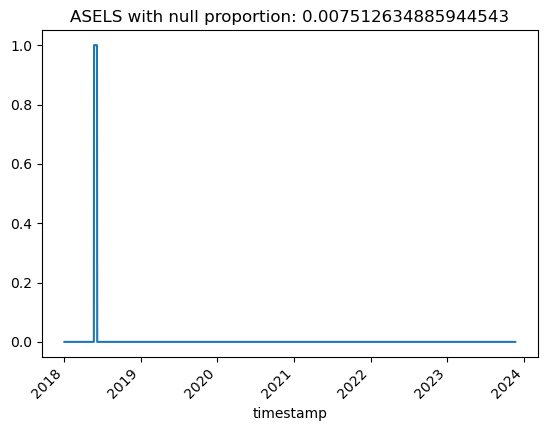

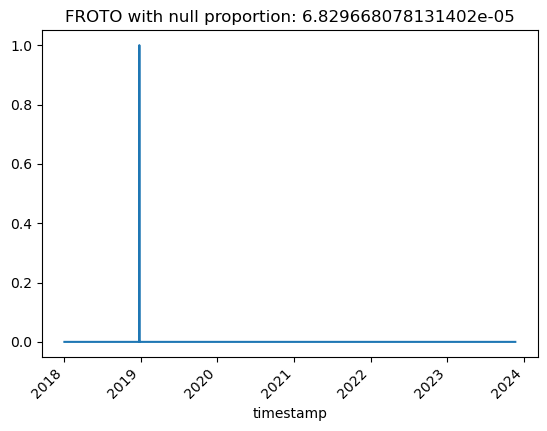

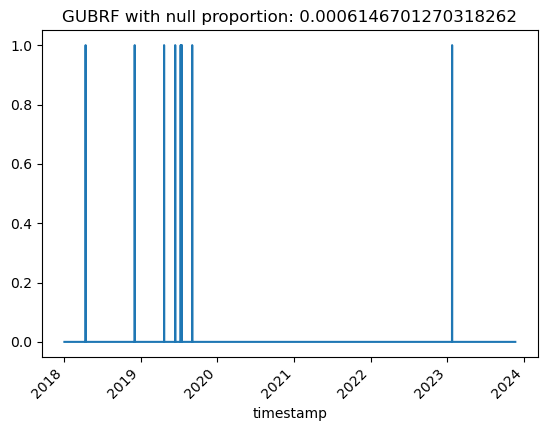

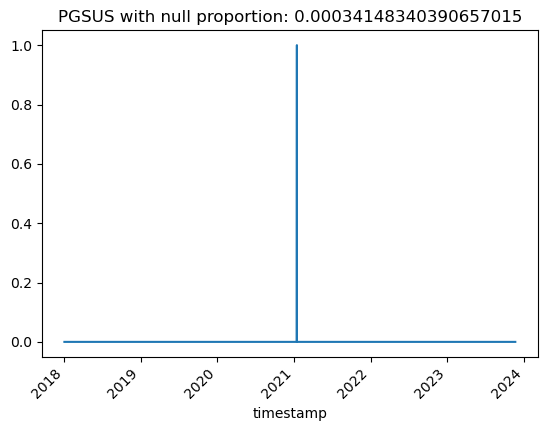

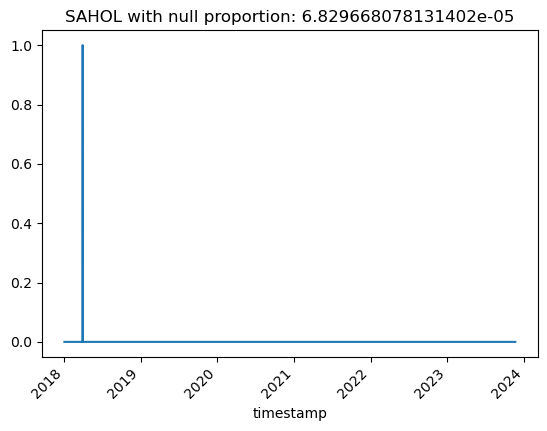

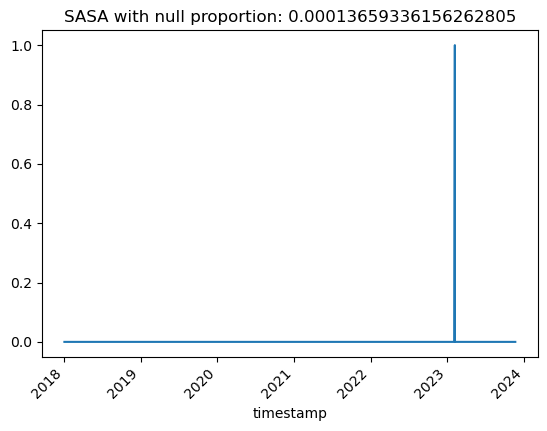

In [15]:
for index, prop in null_proportions.to_dict().items():
    if prop > 0:
        is_null_df = df[index].isna().astype('int')
        is_null_df.plot()
        plt.xticks(rotation=45)
        plt.title(f"{index} with null proportion: {prop}")
        plt.show()

In [16]:
df.isna().sum().sort_values(ascending=False)

short_name
ASELS    110
GUBRF      9
PGSUS      5
SASA       2
FROTO      1
SAHOL      1
date       0
YKBNK      0
VESTL      0
VAKBN      0
TUPRS      0
TTKOM      0
TKFEN      0
THYAO      0
TCELL      0
TAVHL      0
SISE       0
AKBNK      0
PETKM      0
ARCLK      0
KRDMD      0
KOZAL      0
KOZAA      0
KCHOL      0
ISCTR      0
HALKB      0
GARAN      0
EREGL      0
EKGYO      0
DOHOL      0
BIMAS      0
hour       0
dtype: int64

ASELS is the stock with the greatest number of null entries. Though the vast majority of it is okay, the problematic entries form a continuous sequence. The length of the sequence is 110, the data are hourly, so the missing sequence corresponds to 4.58 days. Therefore, imputing the entire sequence with the most recent valid value may be misleading for the models to come. For that reason, we choose to drop ASELS and for the rest of the series, we judge it to be safe to impute the missing values, with the most recent valid entry, instead of dropping them.

In [17]:
df.drop(columns='ASELS', inplace=True)

In [18]:
# fill with the most recent valid value
df.ffill(inplace=True)
df.isna().sum().sort_values(ascending=False)

short_name
AKBNK    0
PGSUS    0
date     0
YKBNK    0
VESTL    0
VAKBN    0
TUPRS    0
TTKOM    0
TKFEN    0
THYAO    0
TCELL    0
TAVHL    0
SISE     0
SASA     0
SAHOL    0
PETKM    0
ARCLK    0
KRDMD    0
KOZAL    0
KOZAA    0
KCHOL    0
ISCTR    0
HALKB    0
GUBRF    0
GARAN    0
FROTO    0
EREGL    0
EKGYO    0
DOHOL    0
BIMAS    0
hour     0
dtype: int64

# Exploratory Analysis

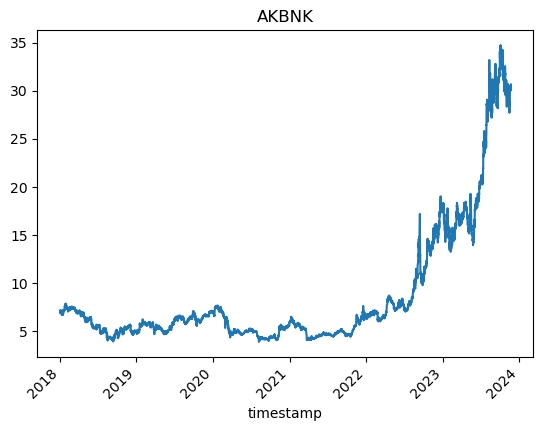

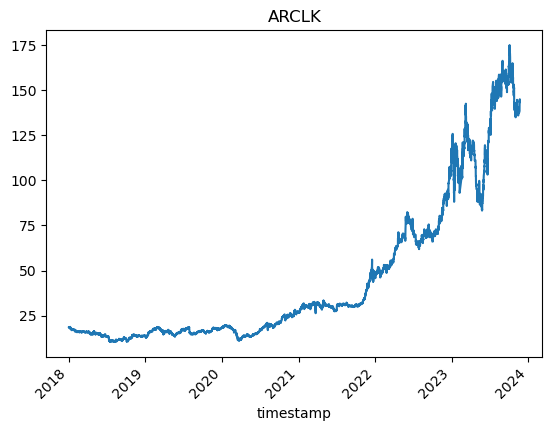

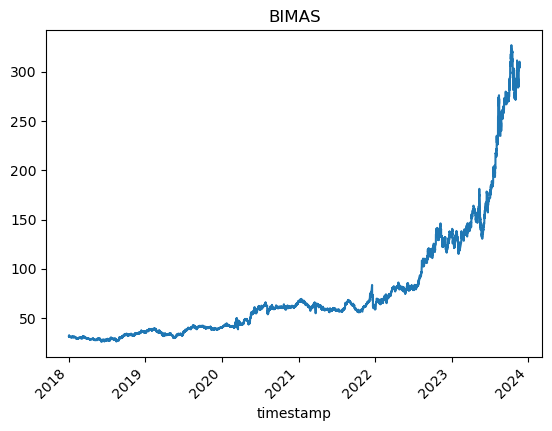

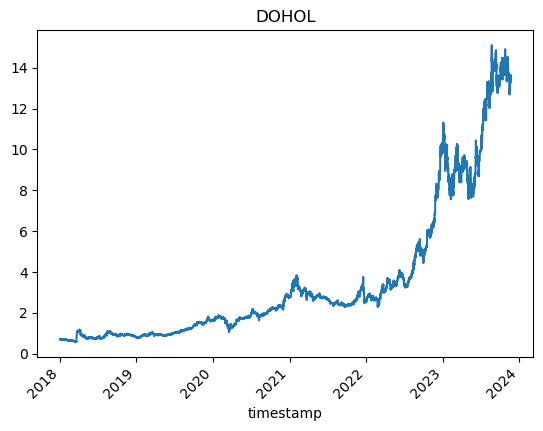

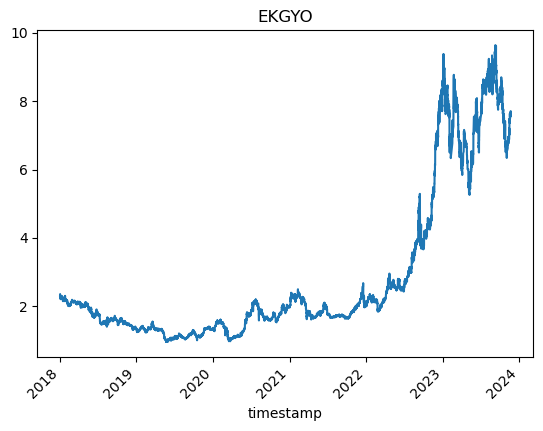

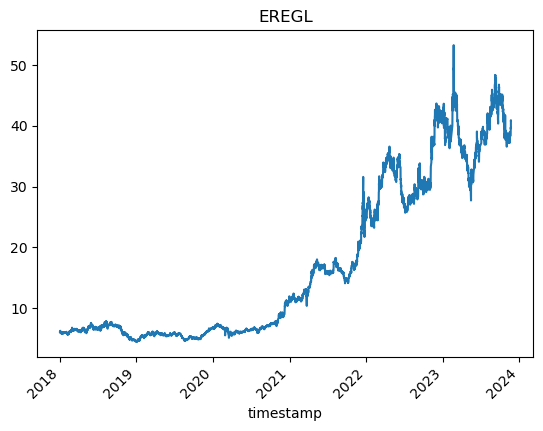

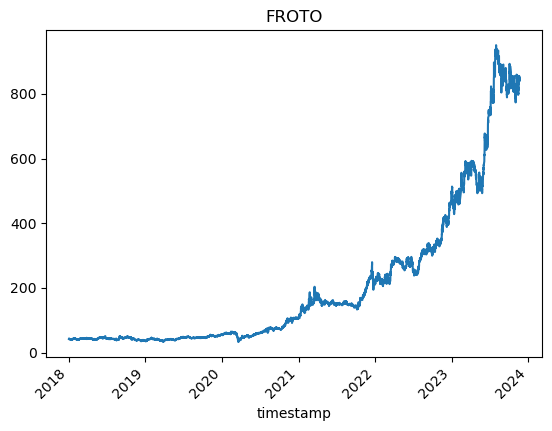

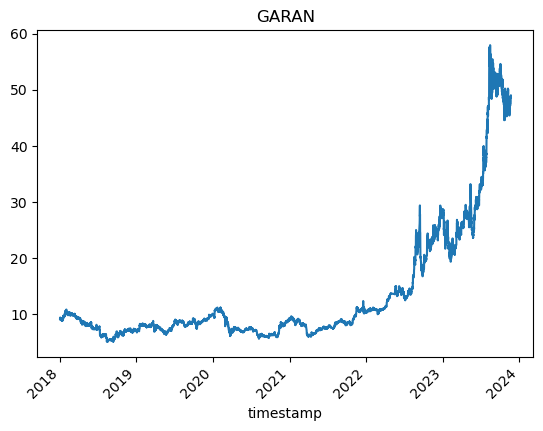

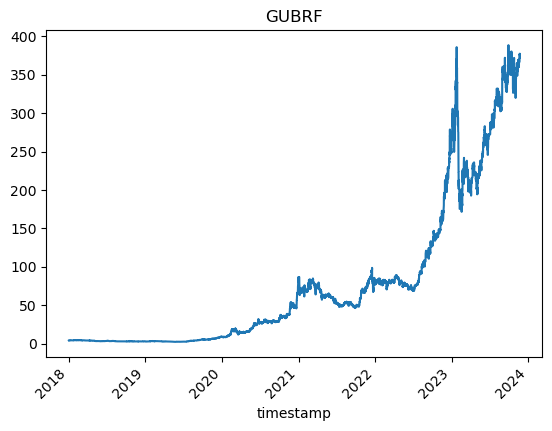

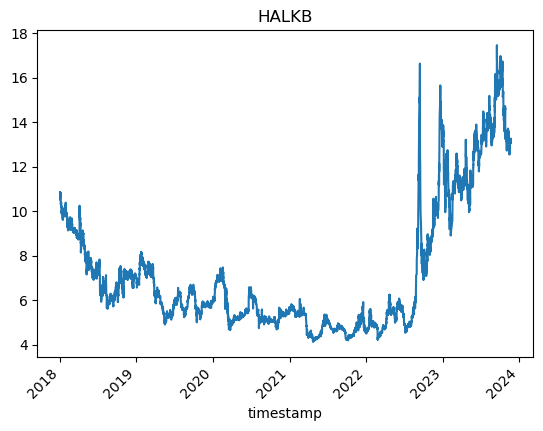

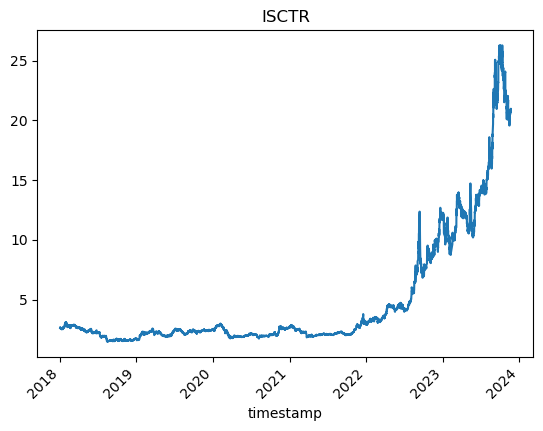

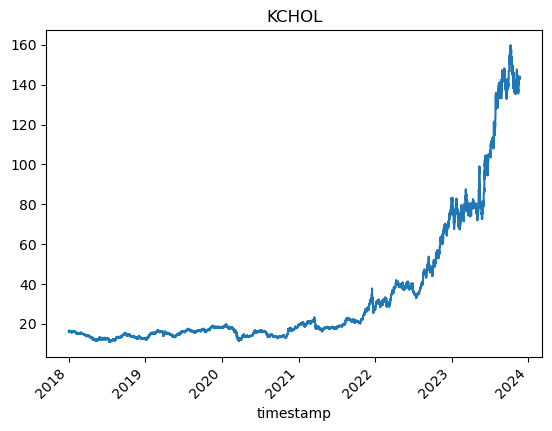

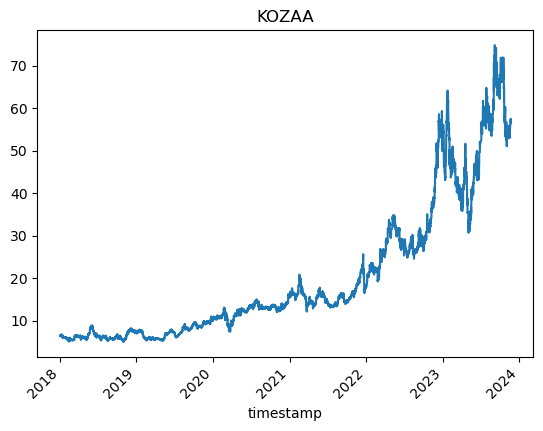

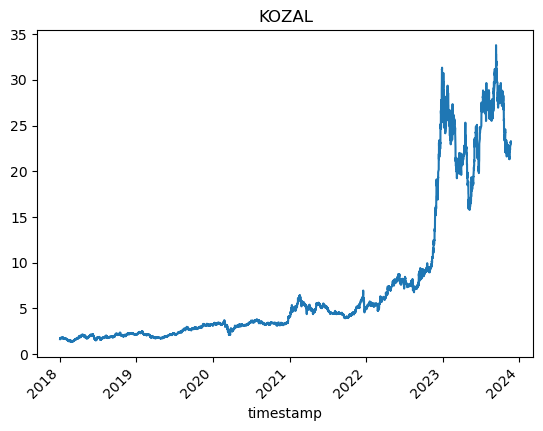

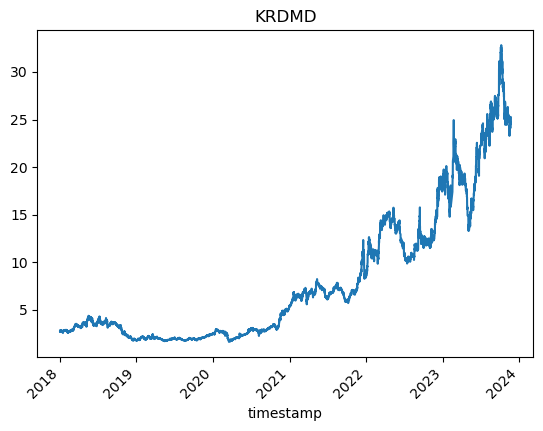

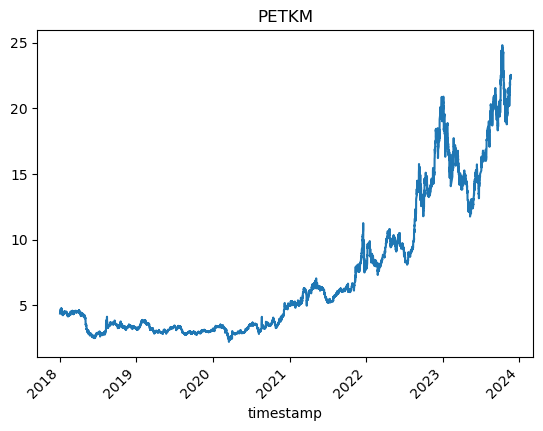

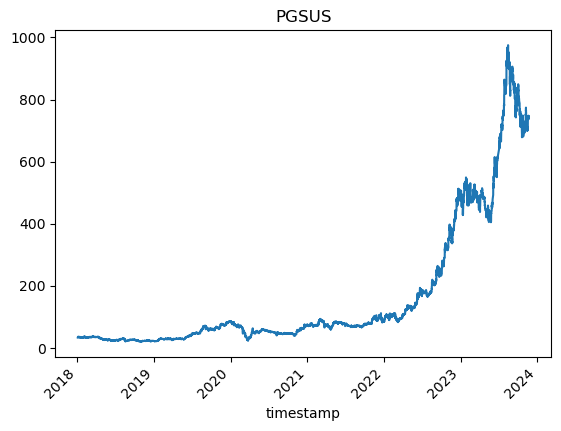

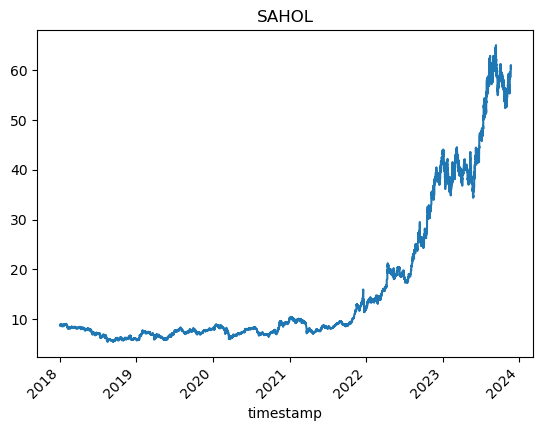

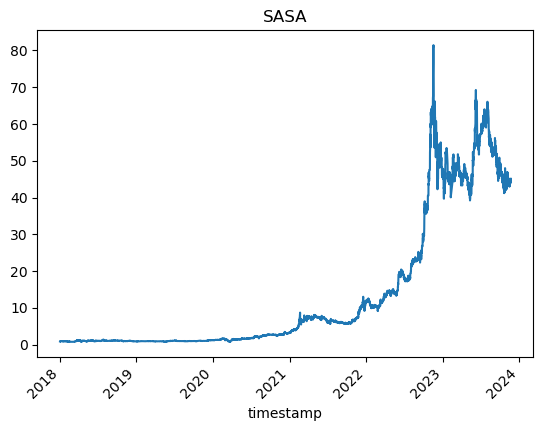

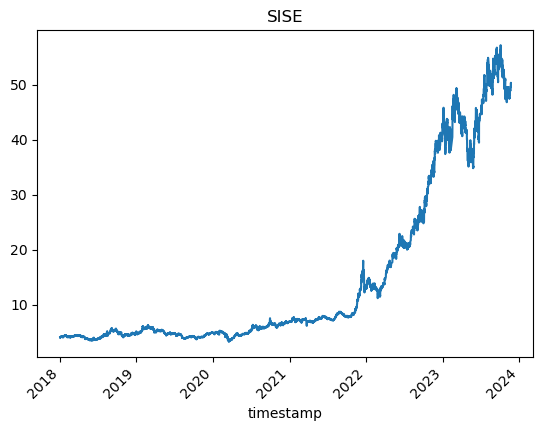

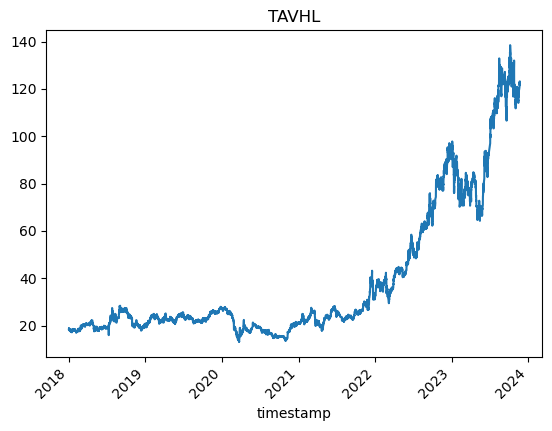

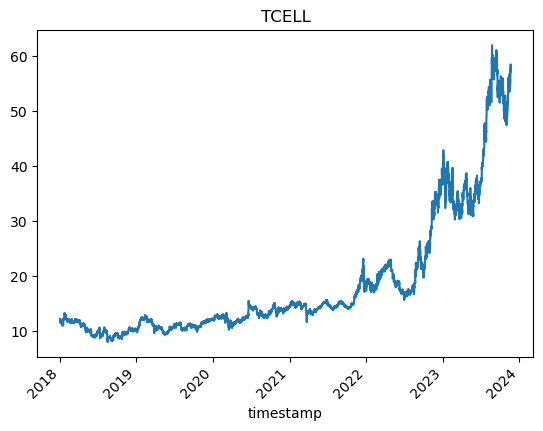

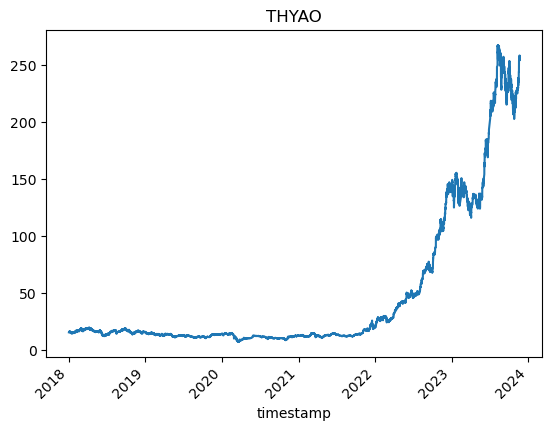

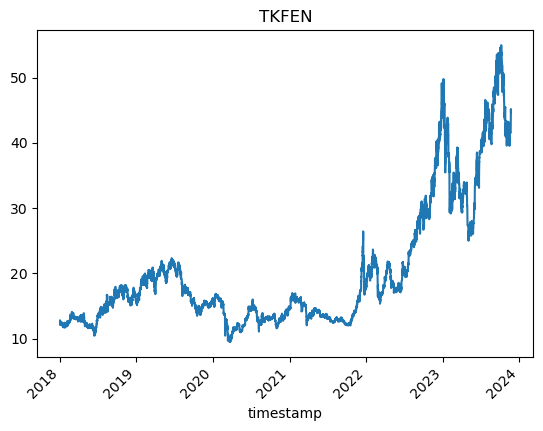

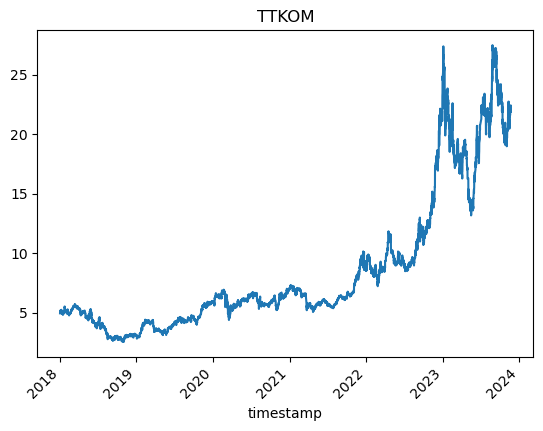

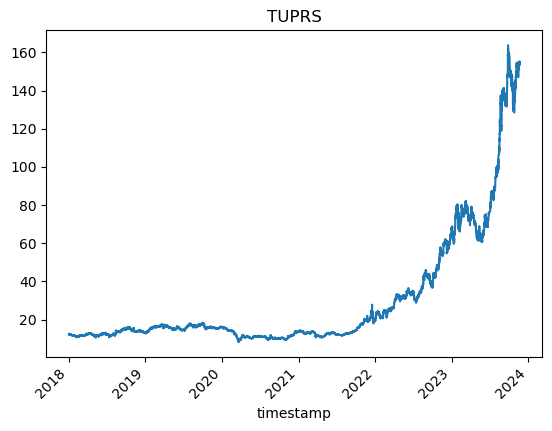

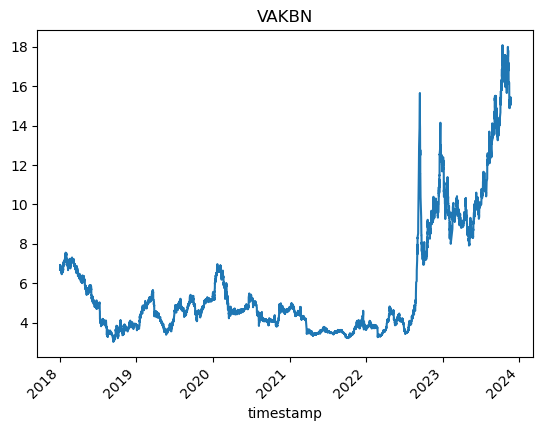

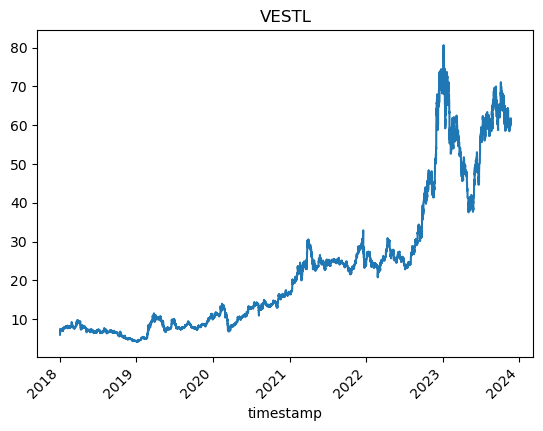

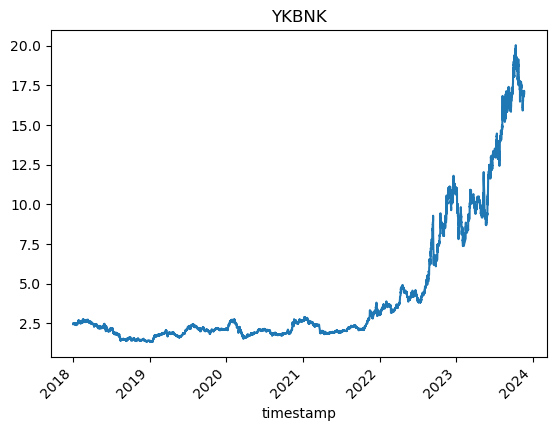

In [19]:
for col in df.columns:
    if col in ['date', 'hour']:
        continue
    df[col].plot()
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [20]:
df.describe()

short_name         AKBNK         ARCLK         BIMAS         DOHOL  \
count       14642.000000  14642.000000  14642.000000  14642.000000   
mean            8.764057     44.823810     77.141987      3.531793   
std             6.631283     41.253391     60.700821      3.540635   
min             3.906300     10.459200     25.985600      0.581700   
25%             5.028500     16.014500     38.254100      1.050100   
50%             6.176300     26.165950     59.847000      2.358000   
75%             7.756900     67.040600     81.240400      3.564800   
max            34.740000    175.000000    327.000000     15.100000   

short_name         EKGYO         EREGL         FROTO         GARAN  \
count       14642.000000  14642.000000  14642.000000  14642.000000   
mean            2.847714     17.147632    206.979868     13.560130   
std             2.272144     13.307671    229.046029     11.065809   
min             0.958900      4.430700     33.348800      5.041400   
25%             1.491500      6.132875     46.209400      7.410700   
50%             1.875400     10.425150    105.235350      8.702300   
75%             2.592000     29.720000    277.927000     13.630900   
max             9.640000     53.300000    950.569200     58.000000   

short_name         GUBRF         HALKB  ...         TAVHL         TCELL  \
count       14642.000000  14642.000000  ...  14642.000000  14642.000000   
mean           78.129834      7.221827  ...     39.171548     18.622318   
std            99.188526      2.910013  ...     29.953716     11.758783   
min             2.280000      4.130000  ...     13.098000      8.066800   
25%             4.280000      5.180000  ...     20.528675     11.449600   
50%            47.980000      6.019000  ...     24.120000     14.033100   
75%            82.700000      8.252250  ...     45.930000     19.782800   
max           388.600000     17.470000  ...    138.500000     62.050000   

short_name         THYAO         TKFEN         TTKOM         TUPRS  \
count       14642.000000  14642.000000  14642.000000  14642.000000   
mean           47.527267     20.284201      8.511076     29.998749   
std            64.349712      9.905056      5.847824     32.130218   
min             7.420000      9.500300      2.560300      8.343900   
25%            12.702500     13.419000      4.807700     12.327600   
50%            15.180000     16.347500      6.148200     15.440600   
75%            46.700000     21.525200      9.410000     32.438800   
max           267.800000     55.000000     27.500000    163.821200   

short_name         VAKBN         VESTL         YKBNK          hour  
count       14642.000000  14642.000000  14642.000000  14642.000000  
mean            5.853147     23.102009      4.327731     13.488185  
std             3.059850     18.485440      4.190630      2.873496  
min             3.020000      4.142100      1.333700      9.000000  
25%             3.870000      8.221100      1.926400     11.000000  
50%             4.610000     16.284800      2.338000     13.000000  
75%             6.684200     27.640000      4.290400     16.000000  
max            18.090000     80.650000     20.040000     18.000000  

[8 rows x 30 columns]

Let's some extreme examples where the stock price has small and high variability.

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
std_df = numeric_df.std().to_frame().rename(columns={0: 'std'}).sort_values('std')


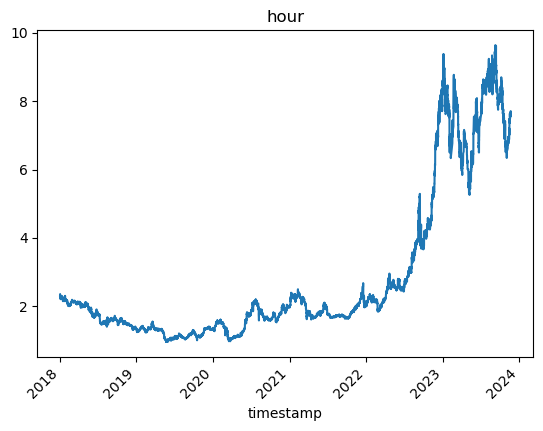

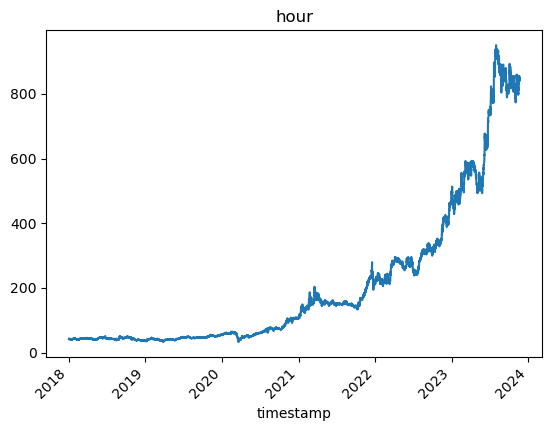

In [22]:
df['EKGYO'].plot()
plt.xticks(rotation=45)
plt.title(col)
plt.show()

df['FROTO'].plot()
plt.xticks(rotation=45)
plt.title(col)
plt.show()

# Identification of Pairs with Correlation Analysis

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix


short_name     AKBNK     ARCLK     BIMAS     DOHOL     EKGYO     EREGL  \
short_name                                                               
AKBNK       1.000000  0.927587  0.956508  0.952171  0.917057  0.782771   
ARCLK       0.927587  1.000000  0.945000  0.973363  0.948539  0.939471   
BIMAS       0.956508  0.945000  1.000000  0.969865  0.889897  0.835067   
DOHOL       0.952171  0.973363  0.969865  1.000000  0.958506  0.876864   
EKGYO       0.917057  0.948539  0.889897  0.958506  1.000000  0.873429   
EREGL       0.782771  0.939471  0.835067  0.876864  0.873429  1.000000   
FROTO       0.941892  0.985568  0.963756  0.980478  0.939189  0.904769   
GARAN       0.992619  0.938193  0.967780  0.956934  0.913215  0.809545   
GUBRF       0.928402  0.969449  0.954867  0.987984  0.959557  0.896928   
HALKB       0.892488  0.774272  0.766697  0.805406  0.871442  0.614556   
ISCTR       0.987428  0.941548  0.969044  0.962506  0.921627  0.812602   
KCHOL       0.982970  0.968225  0.978520  0.980125  0.935448  0.854173   
KOZAA       0.904319  0.977760  0.934189  0.968319  0.947047  0.938524   
KOZAL       0.915634  0.958447  0.906120  0.972553  0.978018  0.874287   
KRDMD       0.892327  0.981087  0.927173  0.949858  0.919521  0.959187   
PETKM       0.895408  0.967986  0.918703  0.949585  0.942522  0.956170   
PGSUS       0.973083  0.963013  0.956808  0.982696  0.959944  0.844258   
SAHOL       0.968316  0.980300  0.958094  0.982069  0.969912  0.892750   
SASA        0.863712  0.934439  0.864404  0.922929  0.951785  0.903720   
SISE        0.927959  0.985298  0.931701  0.971377  0.972952  0.925723   
TAVHL       0.956857  0.970228  0.946395  0.964413  0.947823  0.895170   
TCELL       0.964001  0.966941  0.971420  0.984013  0.946568  0.876437   
THYAO       0.978084  0.955657  0.951404  0.971670  0.960391  0.835102   
TKFEN       0.927816  0.921665  0.890356  0.923858  0.927384  0.834620   
TTKOM       0.914933  0.966661  0.915136  0.969763  0.971244  0.909661   
TUPRS       0.978716  0.942326  0.968068  0.956963  0.905480  0.817786   
VAKBN       0.945469  0.828762  0.872065  0.878849  0.879641  0.679656   
VESTL       0.849749  0.946975  0.889770  0.949754  0.939586  0.935676   
YKBNK       0.985891  0.957574  0.970428  0.973930  0.943502  0.847871   
hour       -0.001242 -0.001220 -0.001058 -0.001142 -0.001830 -0.001441   

short_name     FROTO     GARAN     GUBRF     HALKB  ...     TAVHL     TCELL  \
short_name                                          ...                       
AKBNK       0.941892  0.992619  0.928402  0.892488  ...  0.956857  0.964001   
ARCLK       0.985568  0.938193  0.969449  0.774272  ...  0.970228  0.966941   
BIMAS       0.963756  0.967780  0.954867  0.766697  ...  0.946395  0.971420   
DOHOL       0.980478  0.956934  0.987984  0.805406  ...  0.964413  0.984013   
EKGYO       0.939189  0.913215  0.959557  0.871442  ...  0.947823  0.946568   
EREGL       0.904769  0.809545  0.896928  0.614556  ...  0.895170  0.876437   
FROTO       1.000000  0.953480  0.975224  0.777787  ...  0.963221  0.976635   
GARAN       0.953480  1.000000  0.934635  0.861570  ...  0.963776  0.970779   
GUBRF       0.975224  0.934635  1.000000  0.787402  ...  0.955670  0.977592   
HALKB       0.777787  0.861570  0.787402  1.000000  ...  0.823861  0.817808   
ISCTR       0.947973  0.983068  0.944200  0.872679  ...  0.959147  0.964955   
KCHOL       0.982255  0.985697  0.966652  0.837313  ...  0.973637  0.985488   
KOZAA       0.963465  0.915969  0.974531  0.748590  ...  0.957450  0.965035   
KOZAL       0.952996  0.911974  0.971988  0.823316  ...  0.942855  0.957026   
KRDMD       0.972216  0.906285  0.956849  0.727673  ...  0.941805  0.947503   
PETKM       0.946964  0.908674  0.960066  0.763576  ...  0.963609  0.947851   
PGSUS       0.975377  0.975015  0.967019  0.847886  ...  0.972326  0.980769   
SAHOL       0.979002  0.972468  0.972855  0.849218  ...  0.986095  0.982562   
SASA        0.923400  0.871435  0.929652  0.775602 

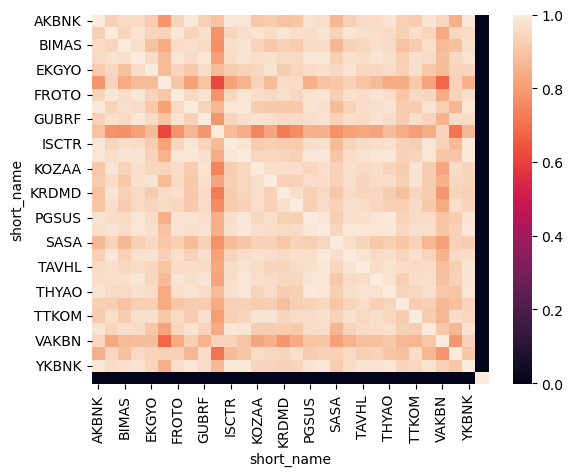

In [24]:
hm = sns.heatmap(data=correlation_matrix, annot=False) 

In [25]:
correlation_matrix.describe()

short_name      AKBNK      ARCLK      BIMAS      DOHOL      EKGYO      EREGL  \
count       30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean         0.903431   0.917170   0.898939   0.922522   0.906313   0.837511   
std          0.177468   0.179134   0.176999   0.178886   0.174354   0.176824   
min         -0.001242  -0.001220  -0.001058  -0.001142  -0.001830  -0.001441   
25%          0.906972   0.939990   0.894297   0.949780   0.917673   0.834732   
50%          0.935147   0.958010   0.945697   0.966366   0.943012   0.875362   
75%          0.971891   0.970033   0.966774   0.973788   0.959294   0.908438   
max          1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

short_name      FROTO      GARAN      GUBRF      HALKB  ...      TAVHL  \
count       30.000000  30.000000  30.000000  30.000000  ...  30.000000   
mean         0.915901   0.906293   0.916827   0.790359  ...   0.920029   
std          0.179021   0.177268   0.178185   0.166006  ...   0.177287   
min         -0.001313  -0.001190  -0.000691  -0.002716  ...  -0.001406   
25%          0.939865   0.912284   0.935824   0.774604  ...   0.943740   
50%          0.958351   0.936414   0.959491   0.820562  ...   0.958548   
75%          0.974472   0.974379   0.970977   0.858482  ...   0.968774   
max          1.000000   1.000000   1.000000   1.000000  ...   1.000000   

short_name      TCELL      THYAO      TKFEN      TTKOM      TUPRS      VAKBN  \
count       30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean         0.921448   0.919820   0.887200   0.910851   0.903750   0.841381   
std          0.178399   0.177746   0.171030   0.176652   0.176644   0.170308   
min         -0.001649  -0.001014  -0.001417  -0.001894  -0.000947  -0.001905   
25%          0.946801   0.928080   0.902482   0.919496   0.912224   0.833676   
50%          0.964995   0.959532   0.923314   0.949193   0.940860   0.875457   
75%          0.975433   0.975563   0.931588   0.969377   0.967472   0.904065   
max          1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

short_name      VESTL      YKBNK       hour  
count       30.000000  30.000000  30.000000  
mean         0.881761   0.921969   0.031985  
std          0.176738   0.177935   0.182830  
min         -0.002334  -0.001109  -0.002716  
25%          0.889279   0.937982  -0.001702  
50%          0.930428   0.961193  -0.001238  
75%          0.947542   0.978421  -0.001068  
max          1.000000   1.000000   1.000000  

[8 rows x 30 columns]

We need two pairs with high correlation for pairs trading. Though negative correlation would also be a strong signal, there is no pair of stock indices that negatively correlated with each other (as can be seen from the non-negativity of the entries of the 'min' row above). Another point is that before finding the highest correlations, we should eliminate the diagonal (as each stock would perfectly correlate itself). This will be done by subtracting an identity matrix from the correlation matrix.

In [26]:
m = correlation_matrix.to_numpy() - np.eye(len(correlation_matrix))
# m

In [27]:
idx = np.unravel_index(np.argsort(m.ravel())[-4:], m.shape)
idx

(array([ 0,  7, 22, 16], dtype=int64), array([ 7,  0, 16, 22], dtype=int64))

In [28]:
m[idx]

array([0.99261877, 0.99261877, 0.99303467, 0.99303467])

In [29]:
pairs = [(0, 7), (16, 22)]

In [30]:
df.columns[list(pairs[0])], df.columns[list(pairs[1])], 

(Index(['AKBNK', 'GARAN'], dtype='object', name='short_name'),
 Index(['PGSUS', 'THYAO'], dtype='object', name='short_name'))

In [31]:
df[['AKBNK', 'GARAN', 'PGSUS', 'THYAO']].corr()

short_name     AKBNK     GARAN     PGSUS     THYAO
short_name                                        
AKBNK       1.000000  0.992619  0.973083  0.978084
GARAN       0.992619  1.000000  0.975015  0.977224
PGSUS       0.973083  0.975015  1.000000  0.993035
THYAO       0.978084  0.977224  0.993035  1.000000

High correlation between Akbank - Garanti, and Turkish Airlines - Pegasus is plausible for at least the following reasons. They are pairwise in the same industries. More importantly, both industries require high capital allocation, thus there are not many competitors and both companies are among the top ones in their industries (Akbank and Garanti are the two of the largest four banks in Turkey, like Turkish Airlines and Pegasus are the top two companies of Turkey's airline industry.) So, the movements in their stock prices are quite generally related with sound economic indicators, which means they are unlikely to be prone to speculative waves. 

In [32]:
df1 = df[['date', 'hour', 'AKBNK', 'GARAN']]

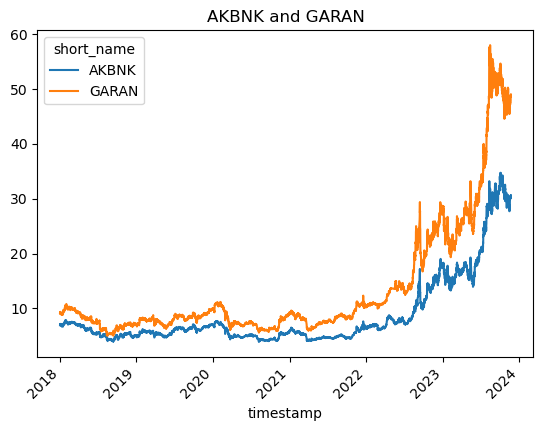

In [33]:
df1[['AKBNK', 'GARAN']].plot()
plt.xticks(rotation=45)
plt.title('AKBNK and GARAN')
plt.show()

In [34]:
df2 = df[['date', 'hour', 'PGSUS', 'THYAO']]

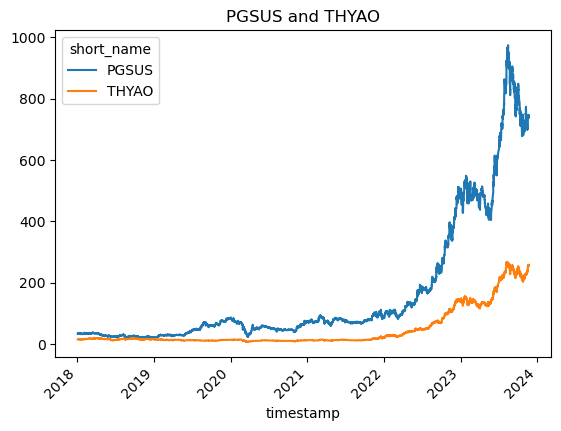

In [35]:
df2[['PGSUS', 'THYAO']].plot()
plt.xticks(rotation=45)
plt.title('PGSUS and THYAO')
plt.show()

# Task 1

linear regression

In [36]:
import statsmodels.api as sm

initial analysis for Akbank and Garanti

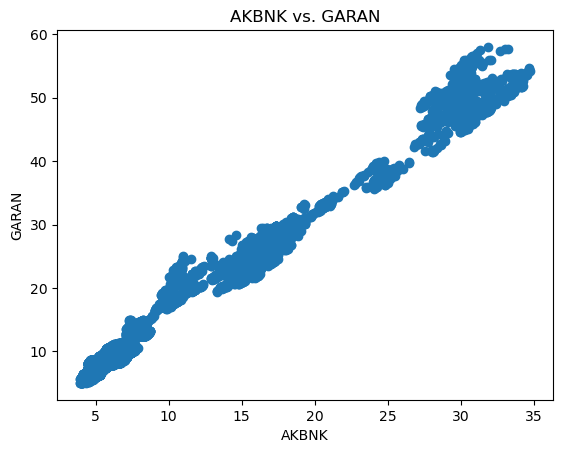

In [37]:
plt.scatter(df1['AKBNK'], df1['GARAN'])
plt.xlabel('AKBNK')
plt.ylabel('GARAN')
plt.title('AKBNK vs. GARAN')
plt.show()

In [38]:
X, y = df1['AKBNK'], df1['GARAN']
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GARAN   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 9.807e+05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:14:56   Log-Likelihood:                -25083.
No. Observations:               14642   AIC:                         5.017e+04
Df Residuals:                   14640   BIC:                         5.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9568      0.018    -52.049      0.000      -0.993      -0.921
AKBNK          1.6564      0.002    990.322      0.000       1.653       1.660
==============================================================================
Omnibus:                     2808.505   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9077.209
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       6.329   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df1['prediction'] = model.fittedvalues
df1['residual'] = model.resid

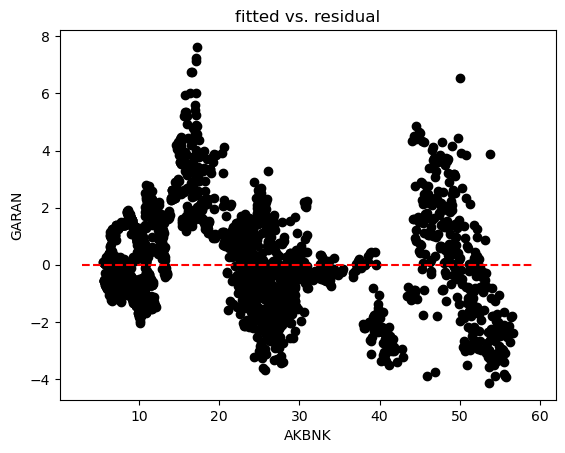

In [40]:
fitted_vs_residual = df1.groupby('prediction').agg({'residual':'mean'}).reset_index()
plt.scatter(fitted_vs_residual['prediction'], fitted_vs_residual['residual'], color='black')
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', colors='red')

plt.xlabel('AKBNK')
plt.ylabel('GARAN')
plt.title('fitted vs. residual')
plt.show()

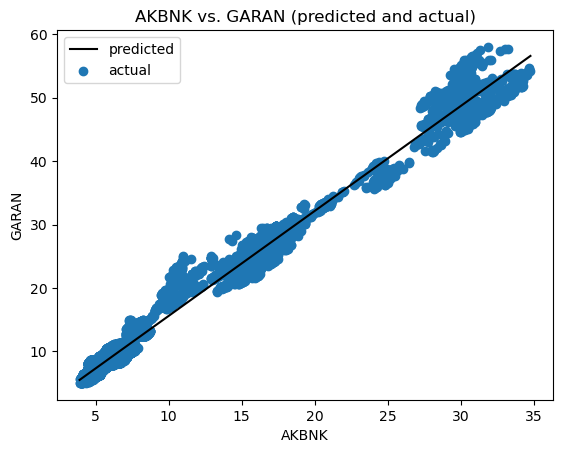

In [41]:
a, b = df1['AKBNK'].min(), df1['AKBNK'].max()
xxx = np.arange(a, b, 0.01)
yyy = model.predict(sm.add_constant(xxx))
plt.plot(xxx, yyy, color='black')

plt.scatter(df1['AKBNK'], df1['GARAN'])

plt.legend(['predicted', 'actual'])
plt.xlabel('AKBNK')
plt.ylabel('GARAN')
plt.title('AKBNK vs. GARAN (predicted and actual)')
plt.show()

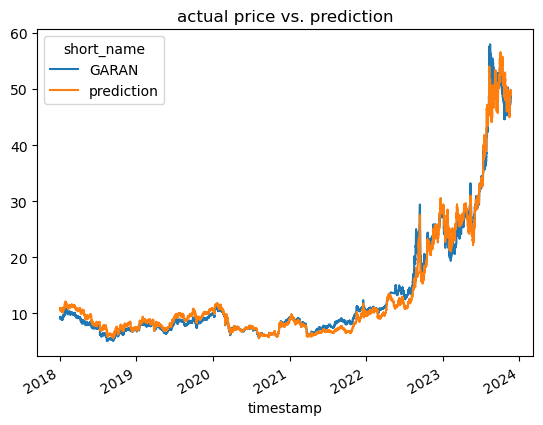

In [42]:
df1[['GARAN', 'prediction']].plot()
plt.title('actual price vs. prediction')
plt.show()

initial analysis for Pegasus and Turkish Airlines

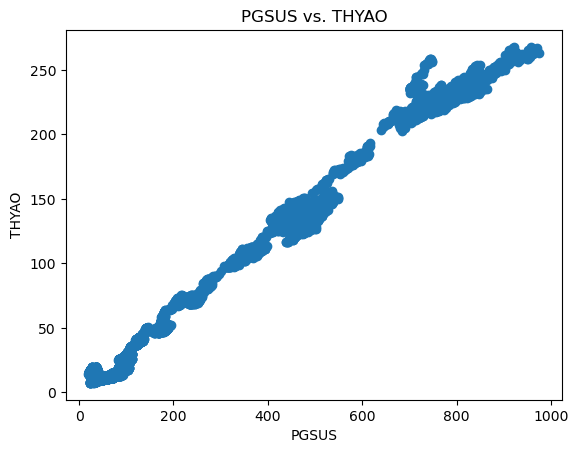

In [43]:
plt.scatter(df2['PGSUS'], df2['THYAO'])
plt.xlabel('PGSUS')
plt.ylabel('THYAO')
plt.title('PGSUS vs. THYAO')
plt.show()

In [44]:
X, y = df2['PGSUS'], df2['THYAO']
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  THYAO   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.040e+06
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:15:07   Log-Likelihood:                -50437.
No. Observations:               14642   AIC:                         1.009e+05
Df Residuals:                   14640   BIC:                         1.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8333      0.079    -10.604      0.000      -0.987      -0.679
PGSUS          0.2944      0.000   1019.780      0.000       0.294       0.295
==============================================================================
Omnibus:                      506.542   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.088
Skew:                           0.453   Prob(JB):                    7.22e-124
Kurtosis:                       3.332   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
df2['prediction'] = model.fittedvalues
df2['residual'] = model.resid

In [46]:
# df2['resid2'] = df2['prediction'] - df2['THYAO']
# df2

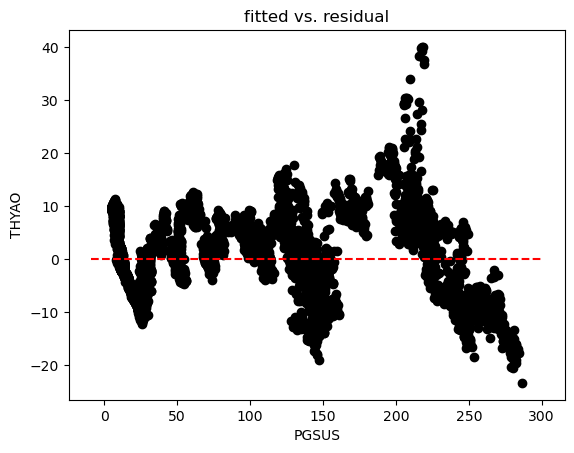

In [47]:
fitted_vs_residual = df2.groupby('prediction').agg({'residual':'mean'}).reset_index()
plt.scatter(fitted_vs_residual['prediction'], fitted_vs_residual['residual'], color='black')
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', colors='red')

plt.xlabel('PGSUS')
plt.ylabel('THYAO')
plt.title('fitted vs. residual')
plt.show()

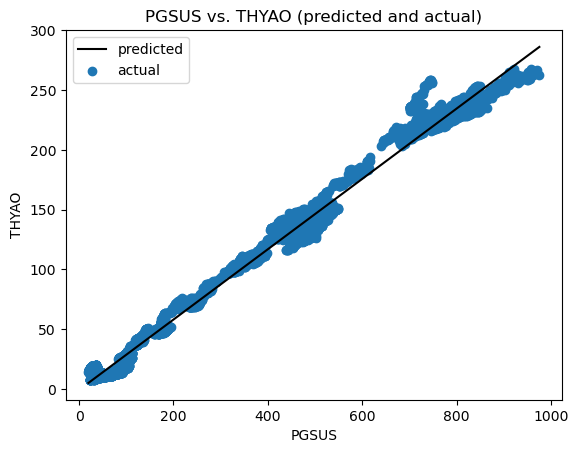

In [48]:
a, b = df2['PGSUS'].min(), df2['PGSUS'].max()
xxx = np.arange(a, b, 0.01)
yyy = model.predict(sm.add_constant(xxx))
plt.plot(xxx, yyy, color='black')

plt.scatter(df2['PGSUS'], df2['THYAO'])

plt.legend(['predicted', 'actual'])
plt.xlabel('PGSUS')
plt.ylabel('THYAO')
plt.title('PGSUS vs. THYAO (predicted and actual)')
plt.show()

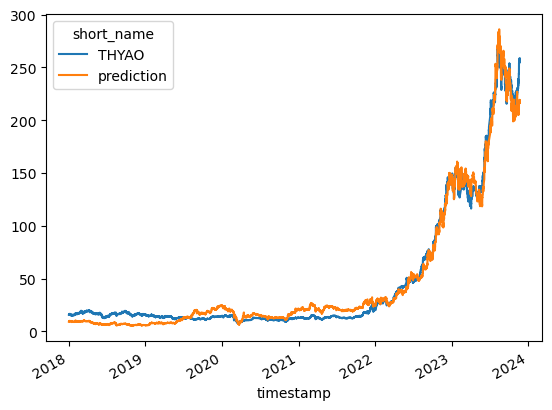

In [49]:
df2[['THYAO', 'prediction']].plot()
plt.show()

It seems that linear regression is applicable for both pairs. Let us have an intriguing grasp of what would a 3-sigma control chart look like in the case of Pegasus and Turkish Airlines.

In [50]:
model_df2 = pd.DataFrame({'prediction': model.fittedvalues.values, 'residual':model.resid.values})
model_df2['std'] = model_df2['residual'].std()

model_df2['+3sigma'] = 3*model_df2['std'] 
model_df2['-3sigma'] = -3*model_df2['std'] 
model_df2

prediction   residual       std    +3sigma    -3sigma
0        9.169787   6.620213  7.581845  22.745534 -22.745534
1        9.258102   6.751898  7.581845  22.745534 -22.745534
2        9.475944   6.574056  7.581845  22.745534 -22.745534
3        9.499494   6.550506  7.581845  22.745534 -22.745534
4        9.493607   6.566393  7.581845  22.745534 -22.745534
...           ...        ...       ...        ...        ...
14637  219.069303  36.930697  7.581845  22.745534 -22.745534
14638  216.125493  38.874507  7.581845  22.745534 -22.745534
14639  217.450207  40.299793  7.581845  22.745534 -22.745534
14640  218.186160  40.063840  7.581845  22.745534 -22.745534
14641  217.744588  40.505412  7.581845  22.745534 -22.745534

[14642 rows x 5 columns]

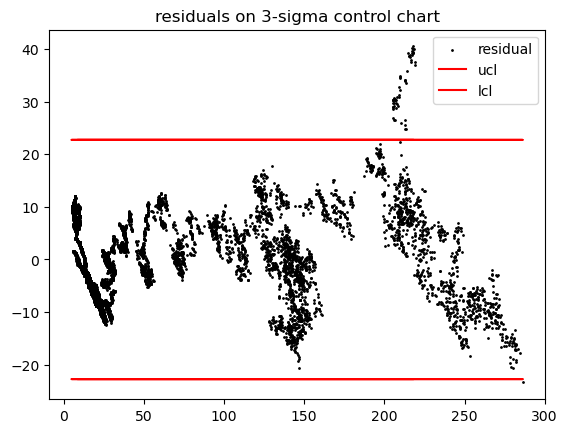

In [51]:
plt.scatter(model_df2['prediction'], model_df2['residual'], label='residual', color='black', s=1)
# plt.plot(model_df2['prediction'], model_df2['std'], label='rolling_std')

plt.plot(model_df2['prediction'], model_df2['+3sigma'], label='+3sigma', color='red')
plt.plot(model_df2['prediction'], model_df2['-3sigma'], label='-3sigma', color='red')
plt.legend(['residual', 'ucl', 'lcl'])
plt.title('residuals on 3-sigma control chart')
plt.show()

In [52]:
# standard error
model.bse

const    0.078582
PGSUS    0.000289
dtype: float64

Description of and Assumptions for the Trading Environment

Assumptions: 
* leakage: In real life, as traders we would be in a situation where we have the stock price data until the timestamp in which we currently are, this data would be all we can manipulate and analyze for future transactions, for which the actual stock prices would not be known beforehand. To simulate this situation, we implemented a "growing window" setting. In this setting, the number of periods to trade and the length of periods are predefined. Let's say, we are to update (retrain) our models in every 10 days using all the historical data available, and then trade in the following ten days. Let's assume further that there will be 5 of such periods (so we will train 5 times and trade in 5 periods consisting of 10 consecutive days). The "backtest" method of the TradingSimulation class is the implementation of this logic. If we were to use all the data provided to train the model and then obtain residuals to decide on how to construct control charts and what kind of trading strategy to employ, this would introduce leakage (as this cannot be applied in the real world, for the future actual prices are not known beforehand), the expected performance of our selected strategy would not be a valid representative of the real world. However, for the sake of simplicity, we deliberately ignored another leakage of similar nature: Upon selecting the highly correlated pairs, we considered all the data available, implicitly assuming that the future prices would be known beforehand. As stated, this was done for simplicity. If one desires to eliminate this leakage as well, the thing to do is filtering the initial data to obtain the first train set ("2018-01-02" => "2023-09-12") and only after then applying the correlation analysis. This would simulate the situation of a real life trader. (The required update can be found in the below two cells. It can be seen that Turkish Airlines and Pegasus is still among the top two pairs with the highest correlation while Akbank and Garanti lost their place to Yapı Kredi and Sabancı Holding.)

* instant transaction: In real markets, a transaction order of a trader can only be executed when there is another trader who whishes to make the opposite transaction. That is, if I give a buy order of stock X and there is no available stock for X currently, my order is executed when another trader gives a sell order that provides sufficient stock quantity for X in the market for me to buy. In the simulation setting, on the other hand, we assumed that a trader can buy and sell each stock right upon giving the order. This is, again, for the sake of simplicity of the analysis.


Description:
* We simulate the situation of a trader who has a certain amount of capital (say, 1000 dollars) and no stock initially. For a pair of stocks, we label them x and y, the stock whose price is used to predict the other's and the stock whose price is tried to be predicted respectively. The prediction of y using x (hereafter y_hat) is -in a sense- the expected value of y in the long run and it is employed to construct upper and lower control limits (UCL an LCL). y rising over UCL indicates that y is overpriced and will fall back to its long run expected level -that is, y_hat. So, in such a case, it is reasonable to sell it. This can be read in the opposite direction as well. y may be moving in its natural levels, in which case x should be underpriced. So, when we detect that y >= UCL, we sell y and buy x. For parallel reasons, when y <= LCL, we sell x and buy y (as y <= LCL indicates that at least one of the following is true: (i) y is underpriced and will rise, (ii) x is overpriced and will drop). We assume that each transaction is made with a certain proportion (say, 10%) of the available capital or stock. That is, if we decide to sell y we sell 10% of the amounnt we have, as long as we possess enough reserve on y. And if we decide to buy y, we use 10% of the cash (balance in the code) we have to do so. In such a case, the number of stocks we would buy is determined by < balance * 0.1 / current price of y >. Finally, when the simulation ends -either by arriving to the last day or by bankruptcy- we sell all our stocks with their current prices.

In [53]:
# initial train period: "2018-01-02" => "2023-09-12"
"""mask = df['date'] <= pd.Timestamp("2023-09-12").date()
correlation_matrix2 = df[mask].corr()
m = correlation_matrix2.to_numpy() - np.eye(len(correlation_matrix2))
idx = np.unravel_index(np.argsort(m.ravel())[-4:], m.shape)
print(idx)
print(m[idx])"""
mask = df['date'] <= pd.Timestamp("2023-09-12").date()

# Apply the mask
filtered_df = df[mask]

# Select only numeric columns for correlation
numeric_df = filtered_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix2 = numeric_df.corr()

# Perform your subsequent operations
m = correlation_matrix2.to_numpy() - np.eye(len(correlation_matrix2))
idx = np.unravel_index(np.argsort(m.ravel())[-4:], m.shape)
print(idx)
print(m[idx])


(array([16, 22, 28, 17], dtype=int64), array([22, 16, 17, 28], dtype=int64))
[0.99159612 0.99159612 0.99178874 0.99178874]


In [54]:
print(df.columns[[16, 22]], df.columns[[28, 17]])

Index(['PGSUS', 'THYAO'], dtype='object', name='short_name') Index(['YKBNK', 'SAHOL'], dtype='object', name='short_name')


In [55]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


class TradingSimulation(object):
    def __init__(self, data, model):
        self.data = data.copy()
        # take the first stock column as x and the second as y
        x_name, y_name = self.data.drop(columns=['date', 'hour']).columns
        xy_map = {x_name:'x', y_name:'y'}
        self.data.rename(columns=xy_map, inplace=True)

        self.model = model
        self._num_days = self.data['date'].nunique()
        
        
    def backtest(self, num_test_days=10, num_steps=5, balance=1000, trade_proportion=0.1, plot=False):
        """
        num_test_days: Number of days to test the strategy at each step
                       In other words, if the parameter value is n, then
                       the model is retrained in every n days and then it
                       is used to trade in the following n days. 
        num_steps: Number of test steps
        """
        # set initial balance and reserves
        self._balance = balance
        self._trade_proportion = trade_proportion
        self._reserves_on_x = 0
        self._reserves_on_y = 0
        
        # obtain the initial number of days to train
        if num_test_days*num_steps > self._num_days:
            raise Exception(f'There is not enough days in the data for num_test_days={num_test_days}, num_steps={num_steps} !')
        else:
            num_train_days = self._num_days - num_test_days*num_steps
        
        total_balance_in_time = [self._balance]
        for step in range(1, num_steps+1):
            # find train days, test days and obtain the train and test sets accordingly
            train_days = self.data['date'].unique()[:num_train_days]
            test_days = self.data['date'].unique()[num_train_days:num_train_days+num_test_days]
            train = self.data[self.data['date'].isin(train_days)]
            test = self.data[self.data['date'].isin(test_days)]

            # fit the model on the train set
            self.model.fit(x=train['x'], y=train['y'])
            # create the control with the fitted model
            self.model.create_control_chart()
            # validate the model on the test set
            self._trade_and_test(test)

            if plot:
                print('****************************************************************************')
                print(f'Siumulation for train days {train_days[0]} => {train_days[-1]} and test days {test_days[0]} => {test_days[-1]}')
                print('****************************************************************************')
                self.model.plot_decisions(train, test)
            
            # get the latest price of x and y stocks
            current_price_x, current_price_y = test[['x', 'y']].to_numpy()[-1,:]

            # calculate the total balance after the current simulation step
            new_total_balance = self._total_balance(current_price_x, current_price_y)
            total_balance_in_time.append(new_total_balance)
            # if the total balance is negative, terminate the simulation
            if new_total_balance < 0:
                # bankruptcy
                break
            # terminate the 
            num_train_days += num_test_days

        self._close(current_price_x, current_price_y)
        # return self._balance
        return total_balance_in_time
        
    def _fit_model(self, x, y):
        X = deepcopy(x)
        self.model.fit(X, y)
        
        
    def _trade_and_test(self, test):
        X, y = test['x'], test['y']
        # feed the newest x and y prices to the model to test through time
        for actual_x, actual_y in zip(X, y):
            self._trade(actual_x, actual_y)


    def _trade(self, actual_x, actual_y):
        opportunity = self.model.control_chart(deepcopy(actual_x), actual_y)
        if opportunity == 'buy':
            self._buy(actual_x, actual_y)
        elif opportunity == 'sell':
            self._sell(actual_x, actual_y)
        
    def _sell(self, price_x, price_y):
        # buys x and sells y
        
        # first, sell y
        if self._reserves_on_y > 0:
            num_stocks_to_sell_y = max(self._reserves_on_y*self._trade_proportion, 0)
            
            self._balance += num_stocks_to_sell_y*price_y
            self._reserves_on_y -= num_stocks_to_sell_y
        
        # then, buy x
        capital_to_buy_x = max(self._balance*self._trade_proportion, 0)
        
        self._balance -= capital_to_buy_x
        self._reserves_on_x += capital_to_buy_x/price_x
            
    def _buy(self, price_x, price_y):
        # sells x and buys y

        # first, sell x
        if self._reserves_on_x > 0:
            num_stocks_to_sell_x = max(self._reserves_on_x*self._trade_proportion, 0)

            self._balance += num_stocks_to_sell_x*price_x
            self._reserves_on_x -= num_stocks_to_sell_x

        # then, buy y
        capital_to_buy_y = max(self._balance*self._trade_proportion, 0)

        self._balance -= capital_to_buy_y
        self._reserves_on_y += capital_to_buy_y/price_y
        
    def _total_balance(self, current_price_x, current_price_y):
        # calculates the total balance if all the stocks held were to be sold right now
        return self._balance + self._reserves_on_x*current_price_x + self._reserves_on_y*current_price_y
    
    def _close(self, current_price_x, current_price_y):
        # sell all the reserves on x and y stocks at their current prices
        self._balance = self._total_balance(current_price_x, current_price_y)

In [56]:
class Model(object):
    """
    base class for predictive models
    """
    def __init__(self, name=None):
        self.name = name
        self._fitted = False

    def fit(self, x, y):
        if self._fitted:
            self._fitted_model = None
        self._fitted_model = self._fit(x, y)
        self._fitted = True

    def _fit(self, X, y):
        raise NotImplementedError()
    
    def predict(self, X):
        raise NotImplementedError()
    
    def create_control_chart(self):
        raise NotImplementedError()

    def control_chart(self):
        raise NotImplementedError()
    
    def plot_decisions(self, train, test):
        self._plot_prices(train, test)
        self._plot_residuals(test)

    def _plot_prices(self, train, test):
        raise NotImplementedError()
    
    def _plot_residuals(self, test):
        raise NotImplementedError()

In [57]:
class LinearRegression(Model):
    def __init__(self, name, k):
        super().__init__(name=name)
        self.k = k
    
    def _fit(self, x, y):
        # fits and returns the fitted model for later use

        X = deepcopy(x)
        # add bias term
        X = sm.add_constant(X)
        # fit the model
        model = sm.OLS(y, X).fit()
        return model
        
    def predict(self, x):
        X = deepcopy(x)
        # add bias term
        if isinstance(x, float):
            X = np.array([1, X]).reshape(1,2)
        else:
            X = sm.add_constant(X)
        
        pred = self._fitted_model.predict(deepcopy(X))
        return pred
    
    def create_control_chart(self):
        k = self.k

        std = self._fitted_model.resid.values.std()
        #print('std:', std)
        self._lb = -k*std
        self._ub = k*std

        # model_df is stored for a possible need for plotting the chart later
        model_df = pd.DataFrame({'prediction': self._fitted_model.fittedvalues.values, 'residual':self._fitted_model.resid.values})
        model_df['std'] = model_df['residual'].std()

        model_df[f'+{k}sigma'] = k*model_df['std'] 
        model_df[f'-{k}sigma'] = -k*model_df['std'] 
        self._model_df = model_df
        
    def control_chart(self, actual_x, actual_y):
        # decide on what to do with the real prices of x and y
        # by firstly predicting y and then checking the residual 
        # against the control chart
        pred_y = self.predict(deepcopy(actual_x))
        resid_y = actual_y - pred_y[0]
        if resid_y <= self._lb:
            return 'buy'
        elif resid_y >= self._ub:
            return 'sell'
        else:
            return 'hold'

    def _plot_prices(self, train, test):        
        model_df = test.copy()
        x_actual_new = model_df['x']
        model_df['pred_y'] = self.predict(x_actual_new)

        model_df = model_df[['date', 'hour', 'y', 'pred_y']]
        model_df['ub'] = model_df['pred_y'] + self._ub
        model_df['lb'] = model_df['pred_y'] - self._ub

        model_df.sort_values(['date', 'hour'], inplace=True)
        model_df.set_index(['date', 'hour'], inplace=True)

        model_df['y'].plot()
        model_df['pred_y'].plot(color='red', linestyle='dashed')
        model_df['ub'].plot(color='black', linestyle='dashed')
        model_df['lb'].plot(color='black', linestyle='dashed')
        plt.ylabel('price')
        plt.xticks(rotation=45)
        plt.legend(['actual price', 'predicted price', 'ucl', 'lcl'])
        plt.title('actual price for stock y vs. control limits')
        plt.show()
        
    def _plot_residuals(self, test):
        model_df = test.copy()
        x_actual_new = model_df['x']

        model_df['pred_y'] = self.predict(x_actual_new)
        model_df['residual_y'] = model_df['y'] - model_df['pred_y']

        model_df['ub'] = self._ub
        model_df['lb'] = self._lb

        plt.scatter(model_df['pred_y'], model_df['residual_y'], label='residual', color='black', s=1)
        plt.plot(model_df['pred_y'], model_df['ub'], label='ub', color='red')
        plt.plot(model_df['pred_y'], model_df['lb'], label='lb', color='red')
        plt.legend(['residuals', 'ucl', 'lcl'])
        plt.title('residuals of y vs. control limits')
        plt.show()


## PGSUS vs THYAO

In [58]:
for k in range(1, 5):
    lm = LinearRegression(name='linear_model', k=k)
    data = df[['date', 'hour', 'PGSUS', 'THYAO']]
    simulation = TradingSimulation(data=data, model=lm)
    print(k, simulation.backtest())

1 [1000, 995.6439566964768, 963.2322433178903, 920.007958598952, 940.2183118719372, 932.0588739269051]
2 [1000, 1000.0, 1000.0521512385919, 988.7759821736845, 1021.9080085255558, 1013.739799076405]
3 [1000, 1000.0, 1000.0, 1000.0, 1000.0, 1041.7844152882153]
4 [1000, 1000.0, 1000.0, 1000.0, 1000.0, 1053.0665398531391]


In [59]:
print(f'Rate of return=  %{(1053.0665398531391-1000)/1000 * 100}')

Rate of return=  %5.306653985313915


The grid search indicates that the best parameter k is 4 (4-sigma control chart with linear regression) with a ror of  %5.31. So, let us see how it decides on when to buy and sell each stock.

In [60]:
lm = LinearRegression(name='linear_model', k=4)

In [61]:
data = df[['date', 'hour', 'PGSUS', 'THYAO']]
data

short_name                 date  hour   PGSUS   THYAO
timestamp                                            
2018-01-02 09:00:00  2018-01-02     9   33.98   15.79
2018-01-02 10:00:00  2018-01-02    10   34.28   16.01
2018-01-02 11:00:00  2018-01-02    11   35.02   16.05
2018-01-02 12:00:00  2018-01-02    12   35.10   16.05
2018-01-02 13:00:00  2018-01-02    13   35.08   16.06
...                         ...   ...     ...     ...
2023-11-21 09:00:00  2023-11-21     9  747.00  256.00
2023-11-21 10:00:00  2023-11-21    10  737.00  255.00
2023-11-21 11:00:00  2023-11-21    11  741.50  257.75
2023-11-21 12:00:00  2023-11-21    12  744.00  258.25
2023-11-21 13:00:00  2023-11-21    13  742.50  258.25

[14642 rows x 4 columns]

In [62]:
simulation = TradingSimulation(data=data, model=lm)

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-12 and test days 2023-09-13 => 2023-09-26
****************************************************************************


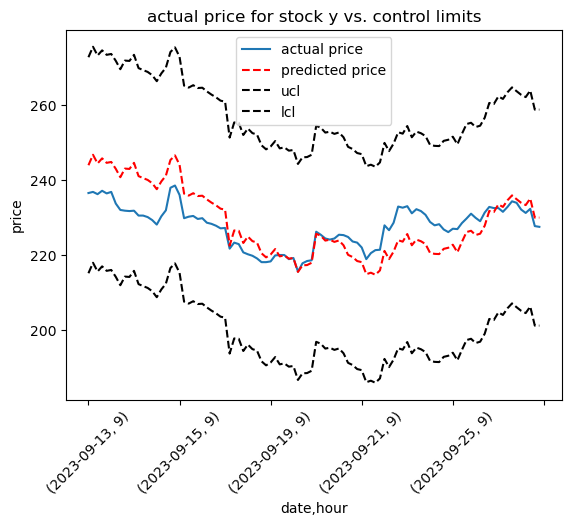

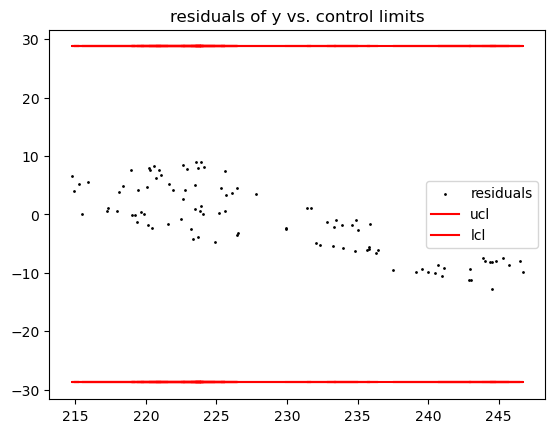

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-26 and test days 2023-09-27 => 2023-10-10
****************************************************************************


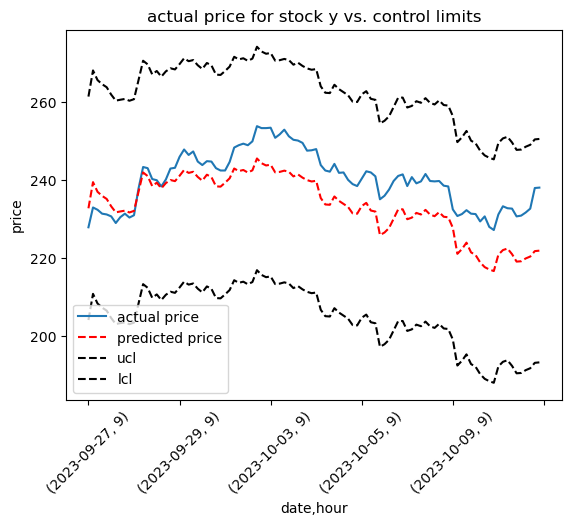

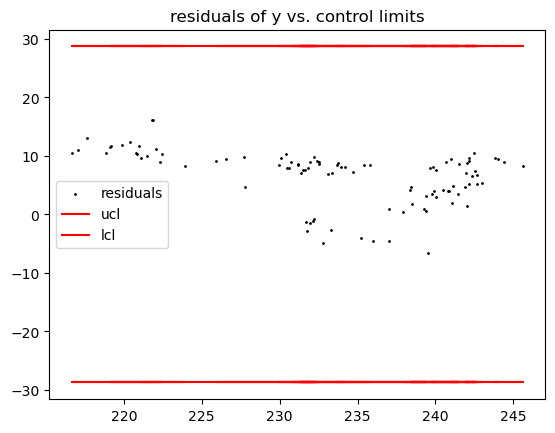

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-10 and test days 2023-10-11 => 2023-10-24
****************************************************************************


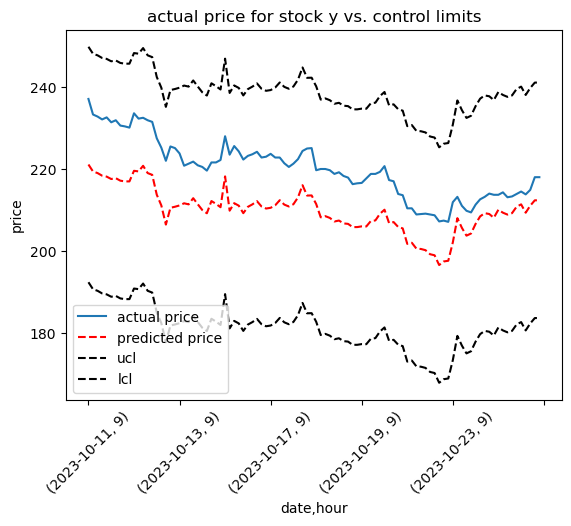

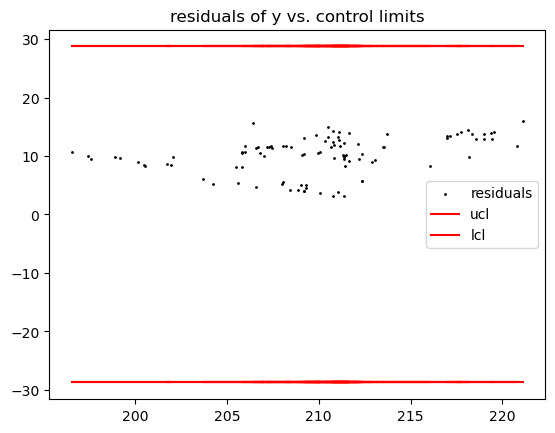

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-24 and test days 2023-10-25 => 2023-11-07
****************************************************************************


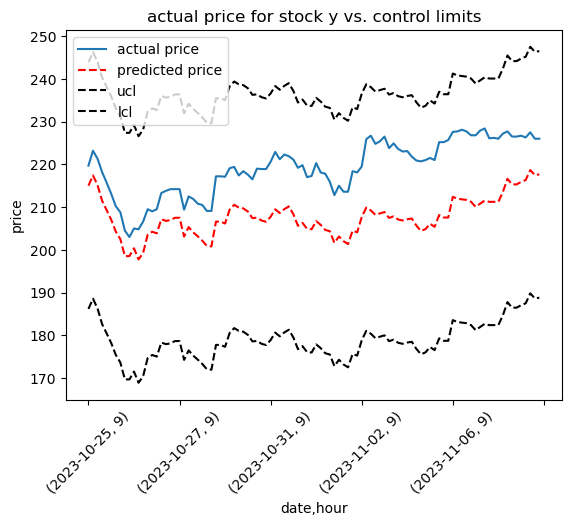

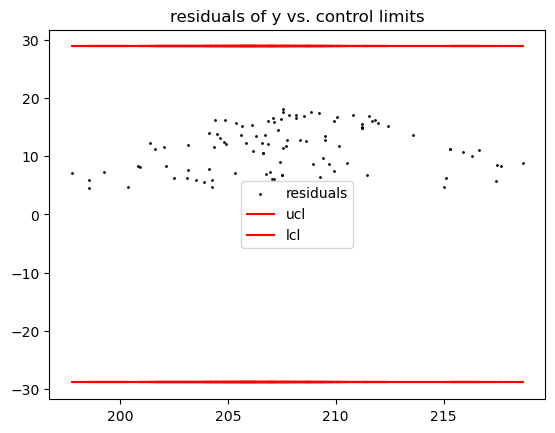

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-11-07 and test days 2023-11-08 => 2023-11-21
****************************************************************************


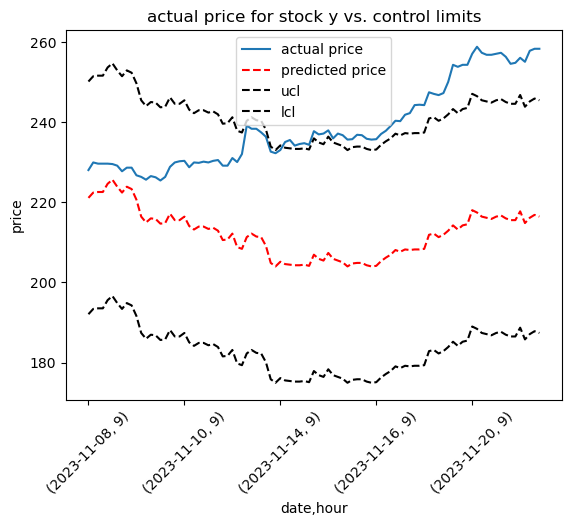

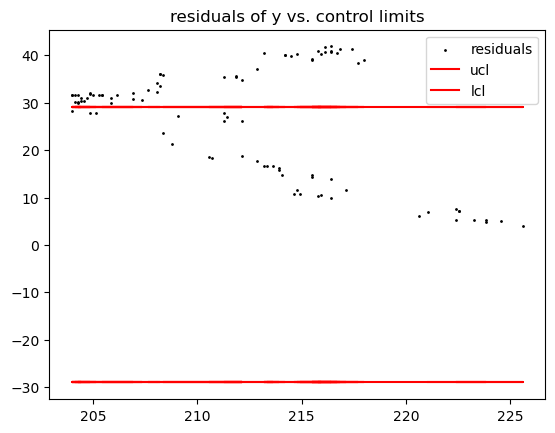

[1000, 1000.0, 1000.0, 1000.0, 1000.0, 1053.0665398531391]

In [63]:
simulation.backtest(plot=True)

It seems that the actual price of THYAO moves within the control limits for the first four periods. In the last period, it rises above the UCL and continues to do so probably because its pattern -more specifically its relation with PGSUS- has changed. Thus, although the rate of return given by the model is good, it is partly due to luck: the model gives order to sell y when it sees that y is above UCL, expecting that it will fall into y_hat but this does not happen, y continues to rise, which makes it more reasonable to hold it (or even buy more from it instead of selling). Fortunately for the model, it does not have any reserve on it, thus no loss incurs. It also gives buy order for x. The price of x rises and the model makes profit. 

A possible reason the y series rises above the UCL is that the model deteriorates after the fourth period. It can be seen below that the correlation between the two stock prices changed a lot during the last period, causing the linear model to predict poorly. This may be due to a shift in the underlying causes of similarity of the two stocks, in which case we would need a more robust model such as a time series model. Another possibility is that this is just a small fluctuation and we should wait to see that our strategy will converge to its steady state in the long run.

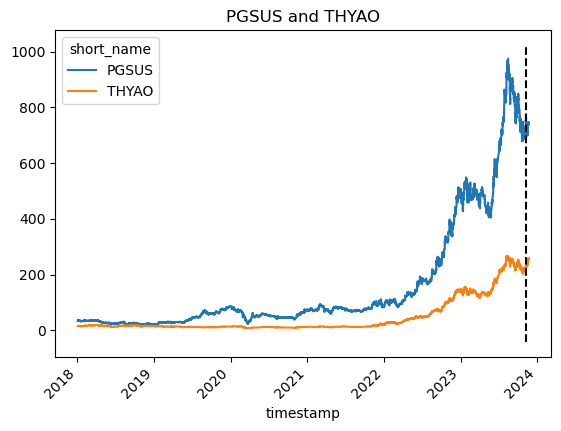

In [116]:
df2[['PGSUS', 'THYAO']].plot()
plt.vlines(pd.Timestamp('2023-11-08'), plt.ylim()[0], plt.ylim()[1], color='black', linestyles='dashed')

plt.xticks(rotation=45)
plt.title('PGSUS and THYAO')
plt.show()

In [117]:
mask = df2['date'] >= pd.Timestamp('2023-11-08').date()


In [118]:
# correlation before shift
df2[~mask][['PGSUS', 'THYAO']].corr()

short_name     PGSUS     THYAO
short_name                    
PGSUS       1.000000  0.993278
THYAO       0.993278  1.000000

In [119]:
# correlation after shift
df2[mask][['PGSUS', 'THYAO']].corr()

short_name     PGSUS     THYAO
short_name                    
PGSUS       1.000000  0.030135
THYAO       0.030135  1.000000

## AKBNK vs GARAN

In [68]:
for k in range(1, 5):
    lm = LinearRegression(name='linear_model', k=k)
    data = df[['date', 'hour', 'AKBNK', 'GARAN']]
    simulation = TradingSimulation(data=data, model=lm)
    print(k, simulation.backtest())

1 [1000, 1094.2378006784377, 1082.9429390668947, 1055.342397662931, 1057.0411393123495, 1031.5600351290047]
2 [1000, 1095.469174852159, 1138.5173461668658, 1109.5465070879166, 1111.332501008259, 1084.5426576300415]
3 [1000, 1000.0, 983.8512552399275, 959.4194673712088, 960.9634880397331, 937.8031780118682]
4 [1000, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


In [69]:
print(f'Rate of return=  %{(1084.5426576300415-1000)/1000 * 100}')

Rate of return=  %8.45426576300415


The grid search indicates that the best parameter k is 2 (2-sigma control chart with linear regression) with a ror of %8.45. So, let us see how it decides on when to buy and sell each stock.

In [70]:
lm2 = LinearRegression(name='linear_model', k=2)

In [71]:
data = df[['date', 'hour', 'AKBNK', 'GARAN']]
data

short_name                 date  hour    AKBNK    GARAN
timestamp                                              
2018-01-02 09:00:00  2018-01-02     9   6.9475   9.2047
2018-01-02 10:00:00  2018-01-02    10   7.0602   9.3157
2018-01-02 11:00:00  2018-01-02    11   7.0954   9.3414
2018-01-02 12:00:00  2018-01-02    12   7.0814   9.3242
2018-01-02 13:00:00  2018-01-02    13   7.1024   9.3328
...                         ...   ...      ...      ...
2023-11-21 09:00:00  2023-11-21     9  30.6800  49.0000
2023-11-21 10:00:00  2023-11-21    10  30.4800  49.0600
2023-11-21 11:00:00  2023-11-21    11  30.4800  48.7600
2023-11-21 12:00:00  2023-11-21    12  30.5000  48.6800
2023-11-21 13:00:00  2023-11-21    13  30.4600  48.5800

[14642 rows x 4 columns]

In [72]:
simulation = TradingSimulation(data=data, model=lm2)

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-12 and test days 2023-09-13 => 2023-09-26
****************************************************************************


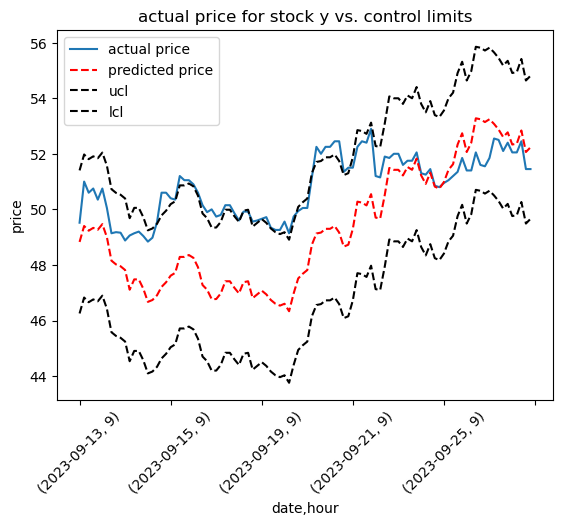

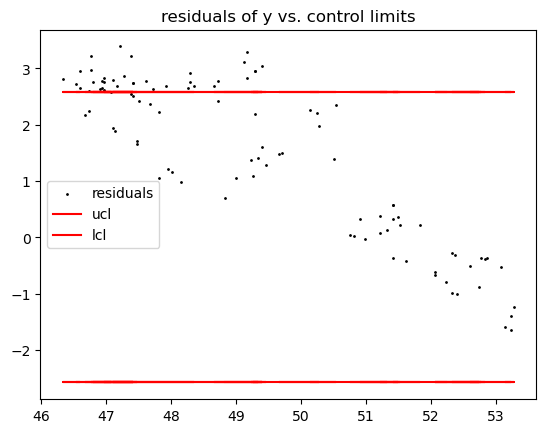

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-26 and test days 2023-09-27 => 2023-10-10
****************************************************************************


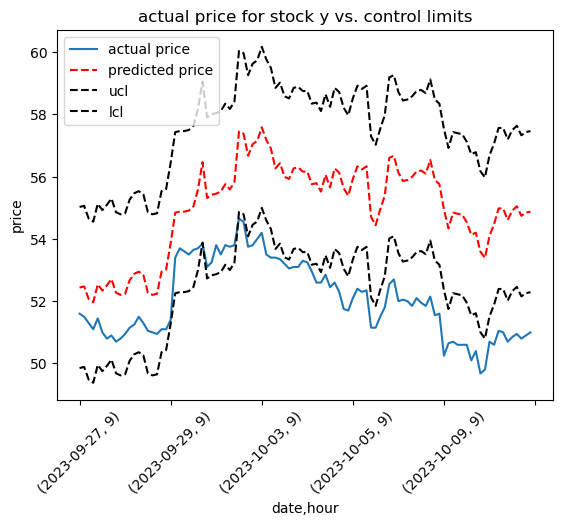

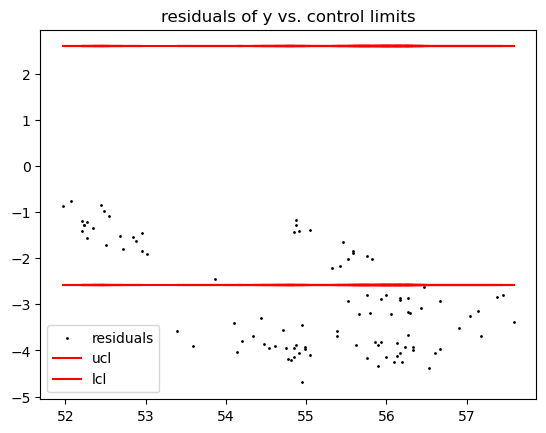

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-10 and test days 2023-10-11 => 2023-10-24
****************************************************************************


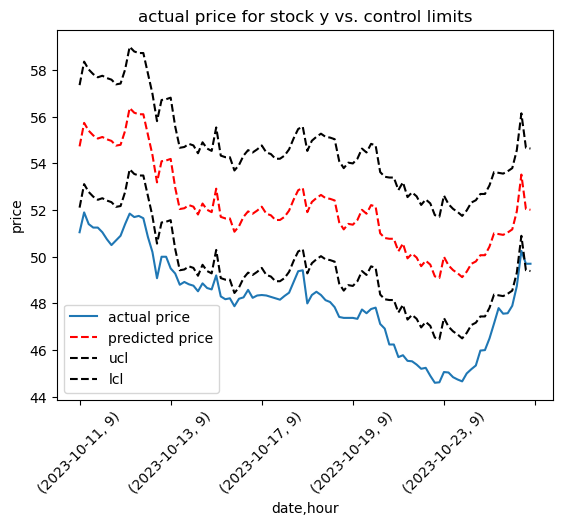

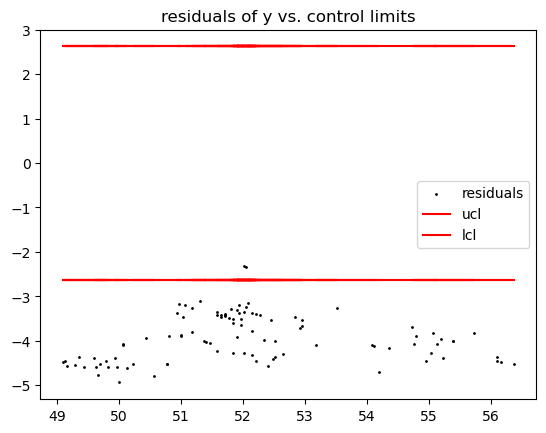

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-24 and test days 2023-10-25 => 2023-11-07
****************************************************************************


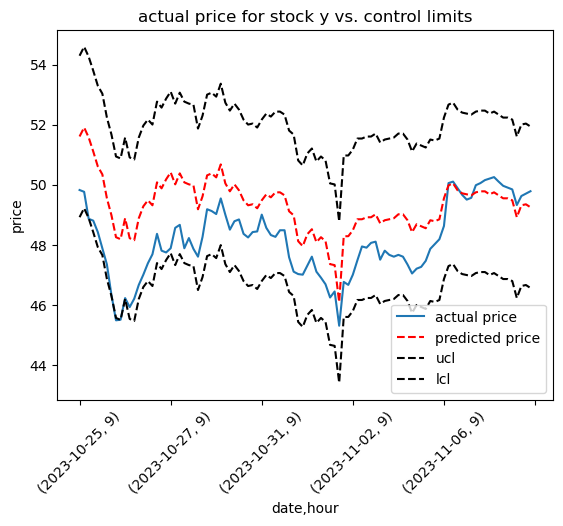

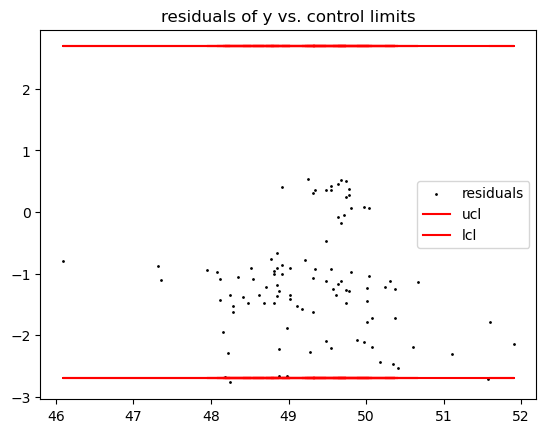

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-11-07 and test days 2023-11-08 => 2023-11-21
****************************************************************************


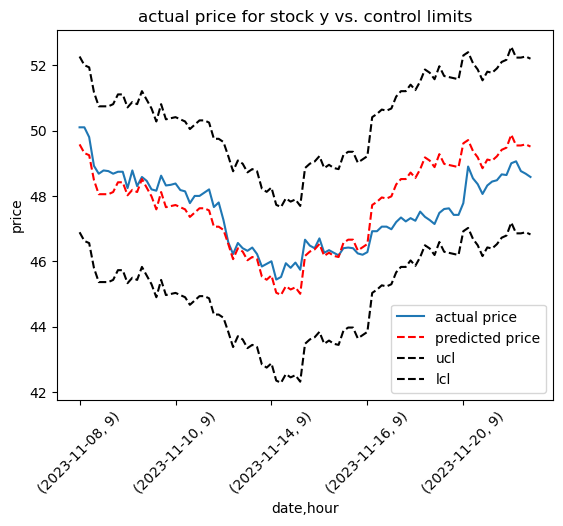

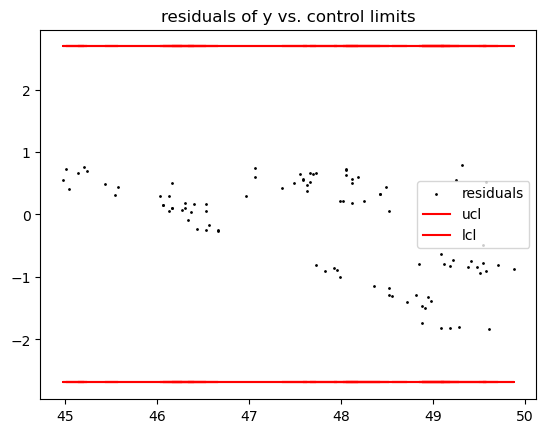

[1000,
 1095.469174852159,
 1138.5173461668658,
 1109.5465070879166,
 1111.332501008259,
 1084.5426576300415]

In [73]:
simulation.backtest(plot=True)

In the first period for train days 2018-01-02 => 2023-09-12 and test days 2023-09-13 => 2023-09-26 it seems that the actual price of GARAN is moving around the UCL at the beginning, however, at the last few days it can be observed that the actual price starts to fall between the UCL and LCL. And the same can be observed for the residuals as well. 

For the second period where train days are 2018-01-02 => 2023-09-26 and test days are 2023-09-27 => 2023-10-10, we observe that the actual price moves around the LCL at first, then for the last days it falls below the LCL, and our predictions are becoming far away from the actual price. As a result, residuals fall below the LCL in most cases for this simulation. 

For the third period where train days are 2018-01-02 => 2023-10-10 and test days are 2023-10-11 => 2023-10-24, we observe a similar pattern as the second simulation. 

Lastly, for the last two periods, simulation becomes more successful, as expected, and actual prices and residuals start to fall between the control limits more often. Also, our predictions come closer to the actual prices. 

Below, you can also see how the correlation between the AKBNK and GARAN stocks are increased in these last two periods (0.991596). The correlation between these two stocks before these last two periods were 0.743363 (calculation can be seen below as well). This increase also explains the improvement in our predictions. 



In [74]:
df1

short_name                 date  hour    AKBNK    GARAN  prediction  residual
timestamp                                                                    
2018-01-02 09:00:00  2018-01-02     9   6.9475   9.2047   10.551164 -1.346464
2018-01-02 10:00:00  2018-01-02    10   7.0602   9.3157   10.737842 -1.422142
2018-01-02 11:00:00  2018-01-02    11   7.0954   9.3414   10.796147 -1.454747
2018-01-02 12:00:00  2018-01-02    12   7.0814   9.3242   10.772958 -1.448758
2018-01-02 13:00:00  2018-01-02    13   7.1024   9.3328   10.807742 -1.474942
...                         ...   ...      ...      ...         ...       ...
2023-11-21 09:00:00  2023-11-21     9  30.6800  49.0000   49.861936 -0.861936
2023-11-21 10:00:00  2023-11-21    10  30.4800  49.0600   49.530654 -0.470654
2023-11-21 11:00:00  2023-11-21    11  30.4800  48.7600   49.530654 -0.770654
2023-11-21 12:00:00  2023-11-21    12  30.5000  48.6800   49.563782 -0.883782
2023-11-21 13:00:00  2023-11-21    13  30.4600  48.5800   49.497526 -0.917526

[14642 rows x 6 columns]

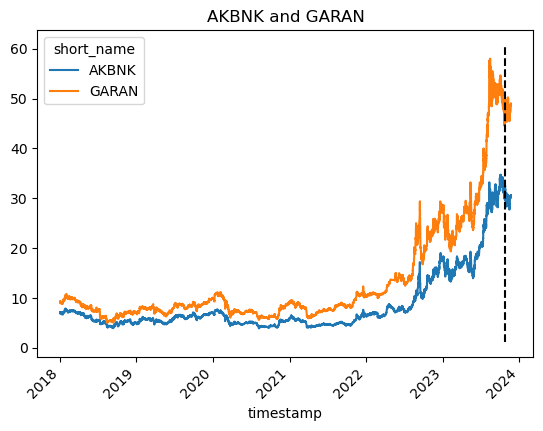

In [120]:
df1[['AKBNK', 'GARAN']].plot()
plt.vlines(pd.Timestamp('2023-10-25'), plt.ylim()[0], plt.ylim()[1], color='black', linestyles='dashed')

plt.xticks(rotation=45)
plt.title('AKBNK and GARAN')
plt.show()

In [121]:
mask = df1['date'] >= pd.Timestamp('2023-10-25').date()


In [122]:
# correlation for the last two periods
df1[~mask][['AKBNK', 'GARAN']].corr()

short_name     AKBNK     GARAN
short_name                    
AKBNK       1.000000  0.991596
GARAN       0.991596  1.000000

In [123]:
# correlation before the last two periods
df1[mask][['AKBNK', 'GARAN']].corr()

short_name     AKBNK     GARAN
short_name                    
AKBNK       1.000000  0.743363
GARAN       0.743363  1.000000

# Task 2

As the stock prices likely depend on time we adopt the following approach. We model both x and y series with time series models to obtain residuals from them -that is, we use only past x (y) values to predict the future x (y) values. If the time series models are good representations of the timely aspect of the stock prices, then with the residuals obtained, we would expect to see the x and y values whose time dimensions are removed. So, the residuals should now be -at least to some extent- independent of time. Now the relation between x_residuals and y_residuals are in a more ideal setting, meaning independent of time. Therefore, we can model y_residual with x_residual with linear regression and then obtain the final prediction of y by adding the two predictions: time series prediction of y and linear model prediction of y_residual using x_residual. We will use ARIMA to model x and y series.

The advantage of this approach against the previous one -the simple linear regression model- is that the time dependencies of x and y series may be different. For instance, x may depend on the two most recent value while y may depend on the five most recent value. By modelling each series with a separate time series model, we would be able to detect such differences in their patterns. 

Let us now demonstrate the general idea on the train set as a proof of concept to see if it makes sense, and then implement it to run on a trading simulation.

In [79]:
from statsmodels.tsa.arima.model import ARIMA

## PGSUS vs THYAO

In [80]:
#best arima model for PGSUS 
#taking a longer test period as there are big changes in the last periods for these stocks
column_to_model = "PGSUS"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


In [81]:
#using auto_arima function to find the best model for PGSUS
from pmdarima import auto_arima

column_to_model = 'PGSUS'

train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]

auto_model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=74488.092, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=70254.665, Time=0.58 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74486.092, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=68317.932, Time=0.64 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=67034.719, Time=0.97 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=66545.894, Time=1.36 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=65890.631, Time=1.94 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=17.46 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=19.73 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=65888.632, Time=1.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=66543.896, Time=0.74 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.48 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf,

In [82]:
#for PGSUS using the parameters found from auto.arima function
column_to_model = "PGSUS"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


model = ARIMA(train_data, order=(5,2,0))
fitted_model_pgsus = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_pgsus.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_pgsus = predictions.reset_index(drop=True)
predictions_reindexed_pgsus.index = test_data.index

residuals_pgsus = test_data - predictions_reindexed_pgsus

print("Residuals:\n", residuals_pgsus)



Residuals:
 timestamp
2023-09-12 09:00:00       5.546062
2023-09-12 10:00:00      11.789808
2023-09-12 11:00:00      13.456728
2023-09-12 12:00:00      14.023733
2023-09-12 13:00:00      16.786286
                          ...     
2023-11-21 09:00:00    1346.668215
2023-11-21 10:00:00    1339.521775
2023-11-21 11:00:00    1346.875334
2023-11-21 12:00:00    1352.228894
2023-11-21 13:00:00    1353.582454
Length: 505, dtype: float64


As can be seen above, residuals from the arima model with parameters suggested by the auto.arima function results in very high values. This means that the parameters suggested are not correctly reflecting our data. Hence, below we tried different models from checking the ACF and PACF plots of our data. 

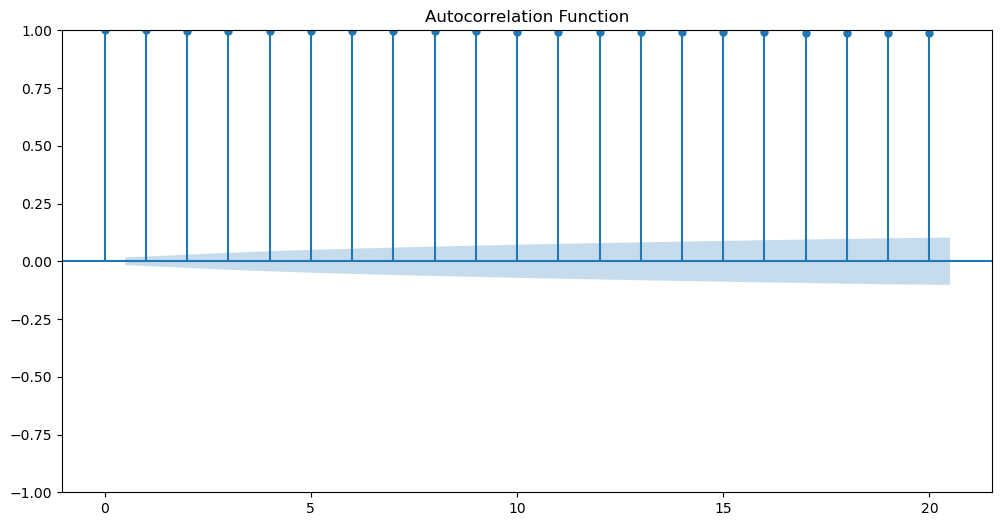

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


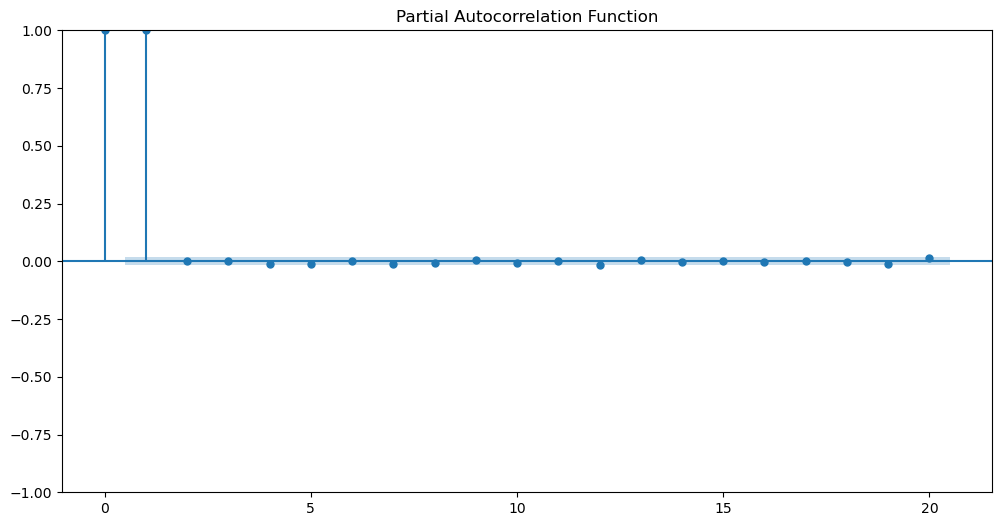

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12,6))
plot_acf(train_data, ax=plt.gca(), lags=20) 
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(12,6))
plot_pacf(train_data, ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function')
plt.show()

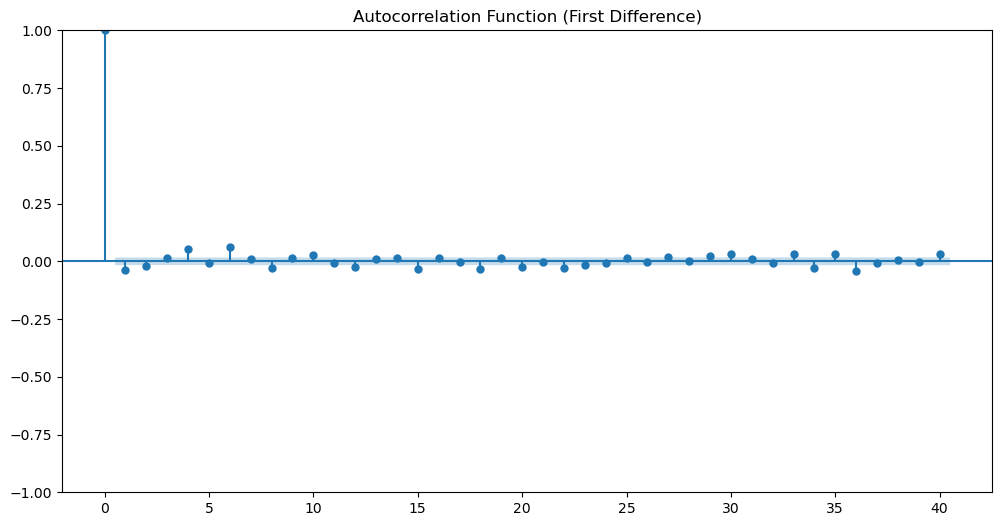

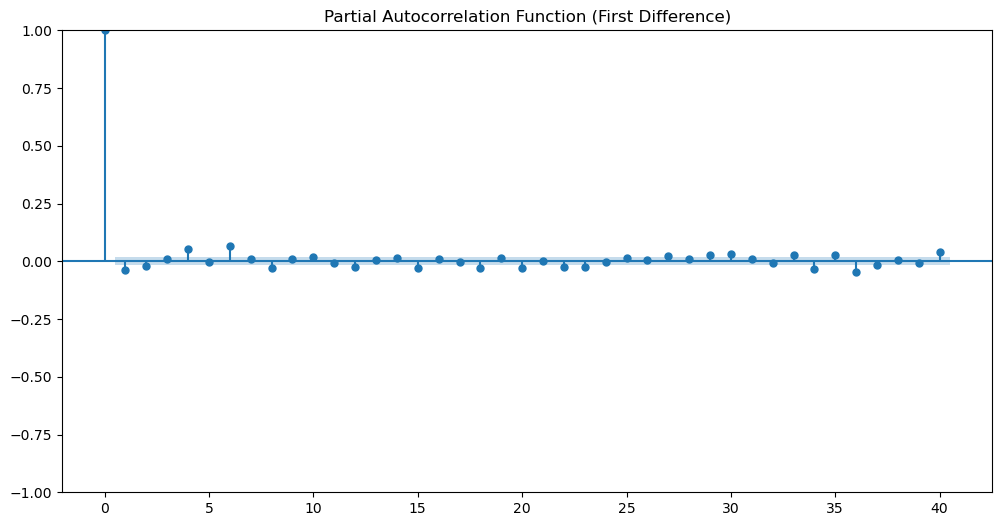

In [84]:
from statsmodels.tsa.statespace.tools import diff

#taking the first difference and checking again: 
train_data_diff = diff(train_data, k_diff=1)

train_data_diff = train_data_diff.dropna()

# Plot ACF of the differenced series
plt.figure(figsize=(12, 6))
plot_acf(train_data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (First Difference)')
plt.show()

# Plot PACF of the differenced series
plt.figure(figsize=(12, 6))
plot_pacf(train_data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (First Difference)')
plt.show()

In [85]:
#parameters for arima found from the pacf and acf plots
model = ARIMA(train_data, order=(1,1,0))
fitted_model_pgsus = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_pgsus.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_pgsus = predictions.reset_index(drop=True)
predictions_reindexed_pgsus.index = test_data.index


residuals_pgsus = test_data - predictions_reindexed_pgsus

print("Residuals:\n", residuals_pgsus)

Residuals:
 timestamp
2023-09-12 09:00:00     2.815218
2023-09-12 10:00:00     6.118343
2023-09-12 11:00:00     4.818228
2023-09-12 12:00:00     1.918232
2023-09-12 13:00:00     2.318232
                         ...    
2023-11-21 09:00:00   -83.181768
2023-11-21 10:00:00   -93.181768
2023-11-21 11:00:00   -88.681768
2023-11-21 12:00:00   -86.181768
2023-11-21 13:00:00   -87.681768
Length: 505, dtype: float64


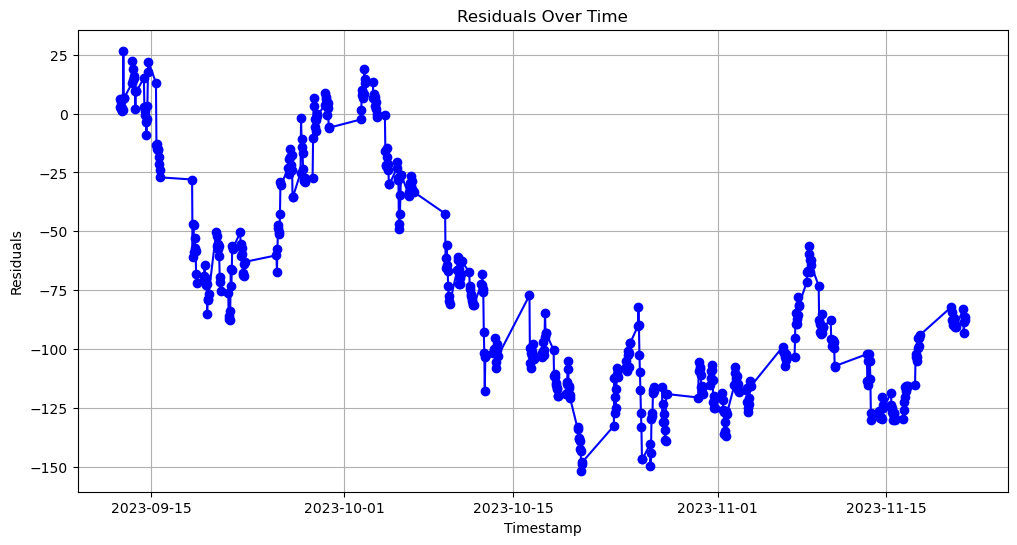

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_pgsus, color='blue', marker='o')
plt.title('Residuals Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

As can be seen from the above plot, the model parameters we found from checking the ACF and PACF plots were still too high. However, we also tried the corner search for the parameters manually. Here are some of the other parameters we have tried:
(1,1,1)
(2,1,2)
(1,0,1)
(1,2,1)
(3,1,2)
(3,1,0)
But none of these parameter sets result in better residuals. The reason behind this might be the fact that stock prices cannot be predicted with solely time series models. Hence we decided to move on with the model we have found above. 
As on the next steps we will be using our other prediction model to better predict the residuals, and combining our predicted residuals with our time series approximation for THYAO, we believed that our final prediction for THYAO stocks will have better approximations to the reality than this model which used solely the time series approach of ARIMA. 

In [87]:
#using auto_arima function to find the best model for THYAO
from pmdarima import auto_arima

column_to_model = 'THYAO'

train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]

auto_model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.46 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=33597.625, Time=0.97 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=30072.140, Time=0.64 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.81 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=33595.625, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=28353.619, Time=0.63 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=27470.026, Time=1.17 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=26938.281, Time=1.36 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=26404.112, Time=1.70 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.17 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.18 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=26402.115, Time=0.92 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=26936.284, Time=0.69 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.64 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf,

In [88]:
#for THYAO, using the parameters suggested from the auto.arima function
column_to_model = "THYAO"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


model = ARIMA(train_data, order=(5,2,0))
fitted_model_thyao = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_thyao.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_thyao = predictions.reset_index(drop=True)
predictions_reindexed_thyao.index = test_data.index

residuals_thyao = test_data - predictions_reindexed_thyao

print("Residuals:\n", residuals_thyao)



Residuals:
 timestamp
2023-09-12 09:00:00      1.516662
2023-09-12 10:00:00      3.744960
2023-09-12 11:00:00      5.307622
2023-09-12 12:00:00      6.516708
2023-09-12 13:00:00      8.014837
                          ...    
2023-11-21 09:00:00    599.711804
2023-11-21 10:00:00    599.865470
2023-11-21 11:00:00    603.769135
2023-11-21 12:00:00    605.422801
2023-11-21 13:00:00    606.576466
Length: 505, dtype: float64


In [89]:
#trying different parameters as the problem above continued using the PACF and ACF plots

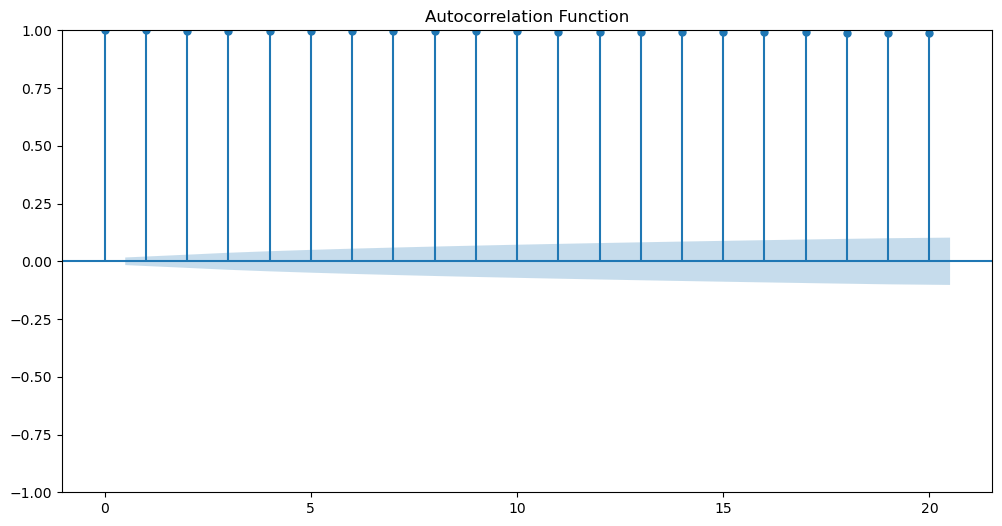

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


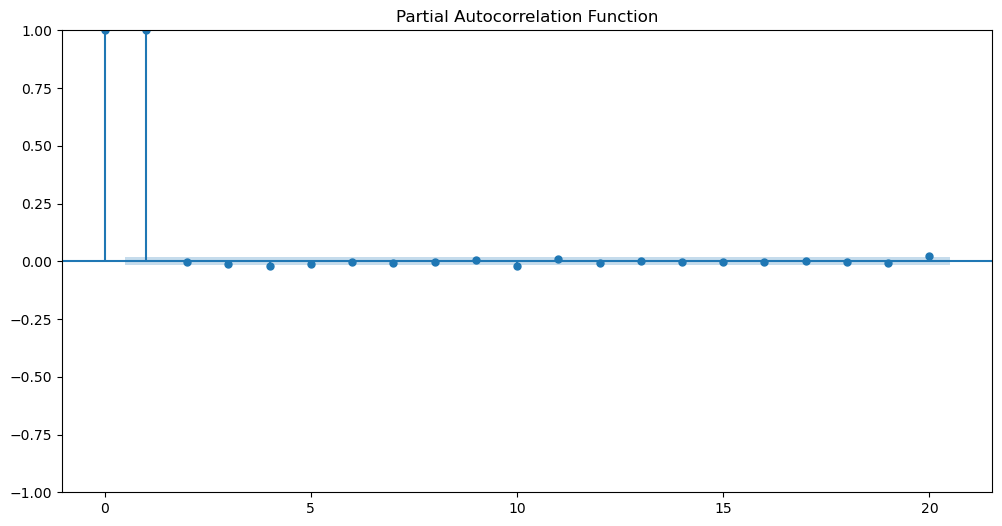

In [90]:
# Plot ACF
plt.figure(figsize=(12,6))
plot_acf(train_data, ax=plt.gca(), lags=20) 
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(12,6))
plot_pacf(train_data, ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function')
plt.show()

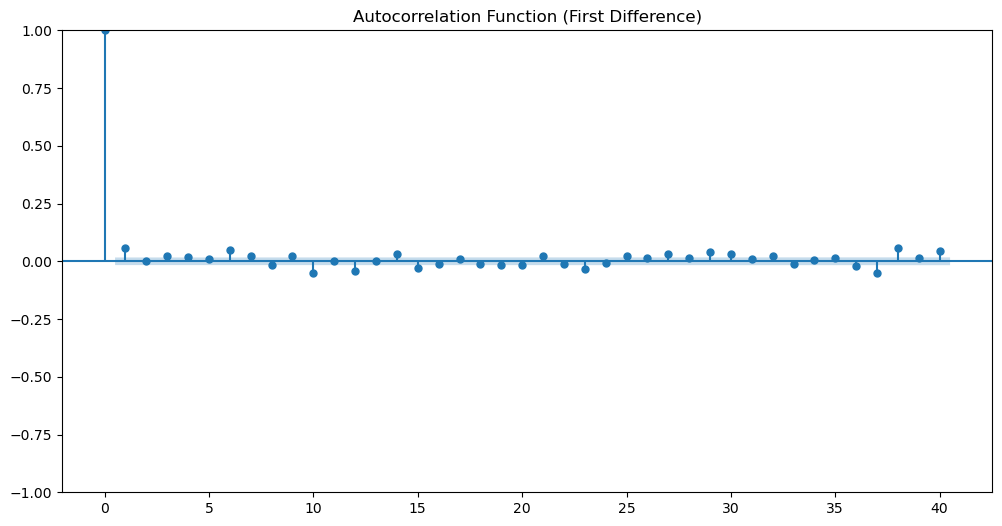

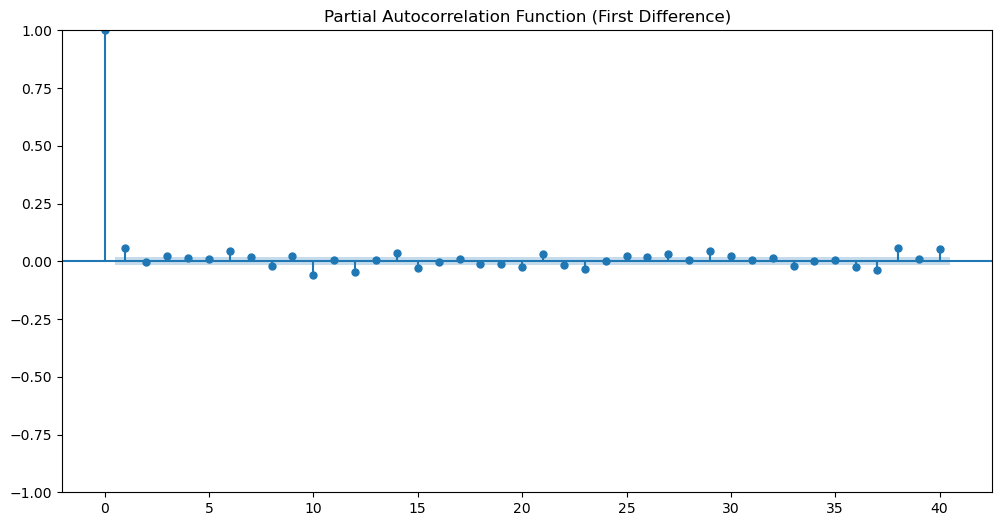

In [91]:
from statsmodels.tsa.statespace.tools import diff

#taking the first difference and checking again: 
train_data_diff = diff(train_data, k_diff=1)

train_data_diff = train_data_diff.dropna()

# Plot ACF of the differenced series
plt.figure(figsize=(12, 6))
plot_acf(train_data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (First Difference)')
plt.show()

# Plot PACF of the differenced series
plt.figure(figsize=(12, 6))
plot_pacf(train_data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (First Difference)')
plt.show()

In [92]:
#for THYAO using the parameters found from the ACF and PACF values
column_to_model = "THYAO"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


model = ARIMA(train_data, order=(1,1,0))
fitted_model_thyao = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_thyao.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_thyao = predictions.reset_index(drop=True)
predictions_reindexed_thyao.index = test_data.index

residuals_thyao = test_data - predictions_reindexed_thyao

print("Residuals:\n", residuals_thyao)



Residuals:
 timestamp
2023-09-12 09:00:00     0.453302
2023-09-12 10:00:00     1.450576
2023-09-12 11:00:00     1.650416
2023-09-12 12:00:00     1.450407
2023-09-12 13:00:00     1.750407
                         ...    
2023-11-21 09:00:00    21.450407
2023-11-21 10:00:00    20.450407
2023-11-21 11:00:00    23.200407
2023-11-21 12:00:00    23.700407
2023-11-21 13:00:00    23.700407
Length: 505, dtype: float64


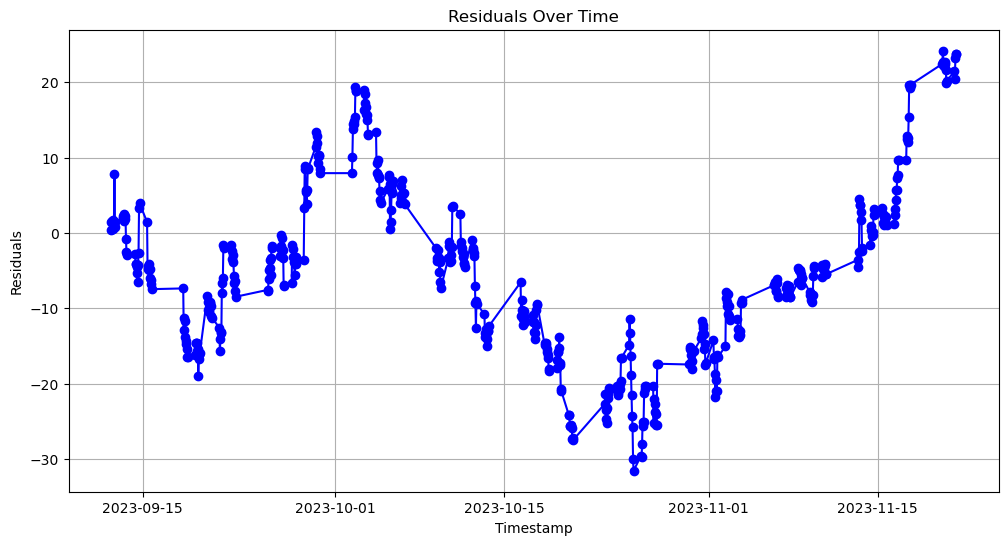

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_thyao, color='blue', marker='o')
plt.title('Residuals Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

All in all, we have the following parameter sets for ARIMA:
* PGSUS: (1,1,0)
* THYAO: (1,1,0)

Let us now analyze the relation between their residuals.

In [94]:
residuals_pgs_thy = pd.DataFrame({'resid_PGSUS':residuals_pgsus, 'resid_THYAO':residuals_thyao})
residuals_pgs_thy

resid_PGSUS  resid_THYAO
timestamp                                    
2023-09-12 09:00:00     2.815218     0.453302
2023-09-12 10:00:00     6.118343     1.450576
2023-09-12 11:00:00     4.818228     1.650416
2023-09-12 12:00:00     1.918232     1.450407
2023-09-12 13:00:00     2.318232     1.750407
...                          ...          ...
2023-11-21 09:00:00   -83.181768    21.450407
2023-11-21 10:00:00   -93.181768    20.450407
2023-11-21 11:00:00   -88.681768    23.200407
2023-11-21 12:00:00   -86.181768    23.700407
2023-11-21 13:00:00   -87.681768    23.700407

[505 rows x 2 columns]

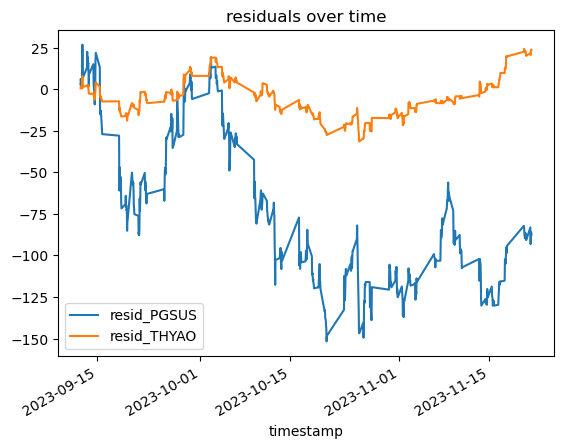

In [95]:
residuals_pgs_thy[['resid_PGSUS', 'resid_THYAO']].plot()
plt.title('residuals over time')
plt.show()

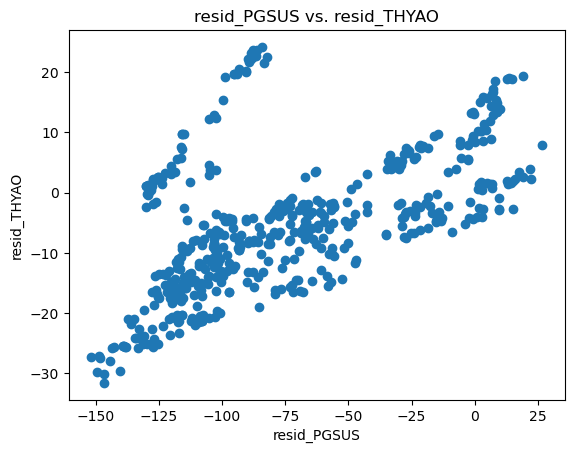

In [96]:
plt.scatter(residuals_pgs_thy['resid_PGSUS'], residuals_pgs_thy['resid_THYAO'])
plt.xlabel('resid_PGSUS')
plt.ylabel('resid_THYAO')
plt.title('resid_PGSUS vs. resid_THYAO')
plt.show()

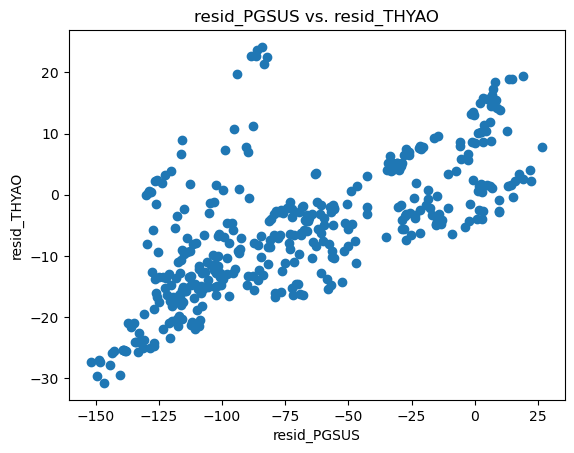

In [97]:
residuals_pgs_thy_grouped = residuals_pgs_thy.groupby('resid_PGSUS').mean().reset_index()
plt.scatter(residuals_pgs_thy_grouped['resid_PGSUS'], residuals_pgs_thy_grouped['resid_THYAO'])
plt.xlabel('resid_PGSUS')
plt.ylabel('resid_THYAO')
plt.title('resid_PGSUS vs. resid_THYAO')
plt.show()

Though not perfect, the relationship between the residuals seems to be linear, as desired.

In [98]:
from statsmodels.tsa.arima.model import ARIMA

class TimeSeriesRegression(Model):
    def __init__(self, name='time_series_regression', k=3, arima_params={'x':(3,1,2), 'y':(3,1,2)}):
        super().__init__(name=name)
        self.k = k
        self.arima_params = arima_params
        self._real_residuals_y_train = [[]]
        self._real_residuals_y = [[]]
        self._final_predictions = []
    
    def _fit(self, x, y):
        # fits and returns the fitted model for later use

        self._final_predictions.append([])
        
        # train arima for x and obtain residuals
        self._model_x = ARIMA(x, order=tuple(self.arima_params['x'])).fit()
        preds_x = self._model_x.predict(start=0, end=len(x), typ='levels')
        residuals_x = x.reset_index(drop=True) - preds_x[1:].reset_index(drop=True)
        
        # train arima for y and obtain residuals
        self._model_y = ARIMA(y, order=self.arima_params['y']).fit()
        preds_y = self._model_y.predict(start=0, end=len(y), typ='levels')
        residuals_y = y.reset_index(drop=True) - preds_y[1:].reset_index(drop=True)

        # train a linear regression model to predict the residuals obtained for y 
        # using the residuals obtained for x
        self._final_model = sm.OLS(deepcopy(residuals_y), sm.add_constant(deepcopy(residuals_x))).fit()
        
        # save backups
        self._model_x_backup = deepcopy(self._model_x)
        self._model_y_backup = deepcopy(self._model_y)
        
        # obtain the overall residuals as: 
        # original y - arima predictions for y - linear regression predictions for y residuals
        real_residuals = y.reset_index(drop=True) - preds_y.reset_index(drop=True) - self._final_model.fittedvalues.reset_index(drop=True)
        # store the residuals obtained during training, 
        # these will be used to create the control charts
        self._real_residuals_y_train.append(real_residuals)
        
        return self._final_model
    
    def _update_without_refit(self, x, y):  
        # inform the time series models of the new observations
        # without retraining them     
        self._model_x = self._model_x.append([x], refit=False)
        self._model_y = self._model_y.append([y], refit=False)
    
    def predict(self, x, y):     
        # predict x and y using their time series models, obtain residuals for x 
        x_pred = self._model_x.forecast().to_numpy()
        x_resid = x - x_pred
        y_pred = self._model_y.forecast().to_numpy()
        # y_resid = y - y_pred

        # using the residuals obtained for x, predict the residuals for y
        # and then obtain the overall prediction for y

        # add bias term
        X = deepcopy(x_resid[0])
        if isinstance(X, float):
            X = np.array([1, X]).reshape(1,2)
        else:
            X = sm.add_constant(X)
        pred = self._final_model.predict(deepcopy(X))
        pred += y_pred
        real_residual_y = y - pred
        # save the overall residual for y 
        self._real_residuals_y[-1].append(real_residual_y[0])
        self._final_predictions[-1].append(pred[0])
        
        # inform the arima models of the most recent x and y values
        self._update_without_refit(x, y)
        
        return pred
    
    def create_control_chart(self):
        k = self.k
        # use the training residuals to calculate standard deviation
        # then find the lcl and ucl
        std = np.std(self._real_residuals_y_train[-1])
        self._lb = -k*std
        self._ub = k*std
        
        self._real_residuals_y.append([])
        
        
    def control_chart(self, actual_x, actual_y):
        # decide on what to do with the real prices of x and y
        # by firstly predicting y and then checking the residual 
        # against the control chart
        self.predict(deepcopy(actual_x), deepcopy(actual_y))
        resid_y = self._real_residuals_y[-1][-1]

        if resid_y <= self._lb:
            return 'buy'
        elif resid_y >= self._ub:
            return 'sell'
        else:
            return 'hold'
        
    def _revert_to_checkpoint(self):
        self._model_x = self._model_x_backup
        self._model_y = self._model_y_backup
        
    def _plot_prices(self, train, test):        
        model_df = test.copy()

        model_df['pred_y'] = self._final_predictions[-1]

        model_df = model_df[['date', 'hour', 'y', 'pred_y']]
        model_df['ub'] = model_df['pred_y'] + self._ub
        model_df['lb'] = model_df['pred_y'] - self._ub

        model_df.sort_values(['date', 'hour'], inplace=True)
        model_df.set_index(['date', 'hour'], inplace=True)

        model_df['y'].plot()
        model_df['pred_y'].plot(color='red', linestyle='dashed')
        model_df['ub'].plot(color='black', linestyle='dashed')
        model_df['lb'].plot(color='black', linestyle='dashed')
        plt.ylabel('price')
        plt.xticks(rotation=45)
        plt.legend(['actual price', 'predicted price', 'ucl', 'lcl'])
        plt.title('actual price for stock y vs. control limits')
        plt.show()
        
        
    def _plot_residuals(self, test):
        model_df = test.copy()

        model_df['pred_y'] = self._final_predictions[-1]

        model_df['residual_y'] = model_df['y'] - model_df['pred_y']
        
        model_df['ub'] = self._ub
        model_df['lb'] = self._lb

        plt.scatter(model_df['pred_y'], model_df['residual_y'], label='residual', color='black', s=1)
        plt.plot(model_df['pred_y'], model_df['ub'], label='ub', color='red')
        plt.plot(model_df['pred_y'], model_df['lb'], label='lb', color='red')
        plt.legend(['residuals', 'ucl', 'lcl'])
        plt.title('residuals of y vs. control limits')
        plt.show()


In [99]:
# grid search for control chart parameter k 

for k in range(1, 5):
    tsr = TimeSeriesRegression(name='time_series_model', k=k, arima_params={'x':(1,1,0), 'y':(1,1,0)})
    data = df[['date', 'hour', 'PGSUS', 'THYAO']]
    simulation = TradingSimulation(data=data, model=tsr)
    print(k, simulation.backtest())

1 [1000, 978.0439114851838, 985.9991590249049, 938.235308404222, 962.9267929932797, 1001.8826520107475]
2 [1000, 980.4125127579161, 987.1185984312092, 938.0897378735738, 964.4974106436224, 1006.9180562729496]
3 [1000, 989.1973871427406, 993.1550860352007, 943.2067195868178, 963.8754196506266, 1010.9040598291953]
4 [1000, 994.5382850420482, 994.2305623191556, 945.8838180851392, 967.5039706410568, 1002.9749410023862]


In [ ]:
# The best k seems to be 3, with its highest rate of return. Let us check its behavior. 
# RoR = %1.9

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-12 and test days 2023-09-13 => 2023-09-26
****************************************************************************


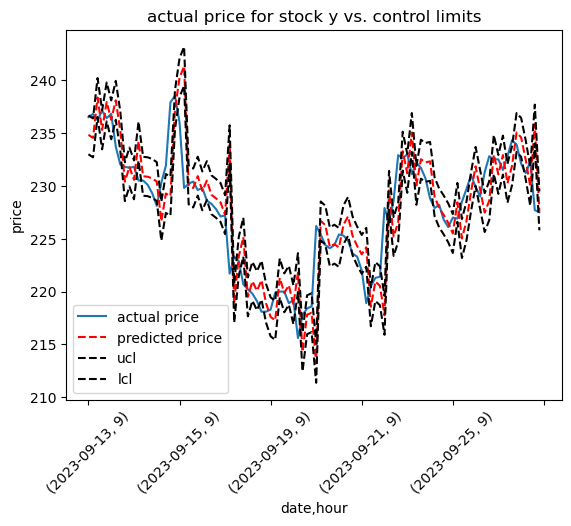

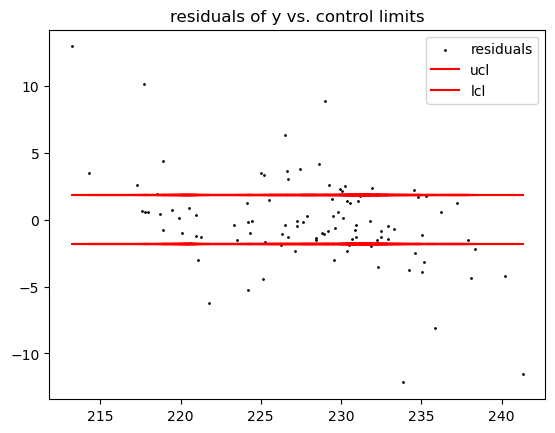

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-26 and test days 2023-09-27 => 2023-10-10
****************************************************************************


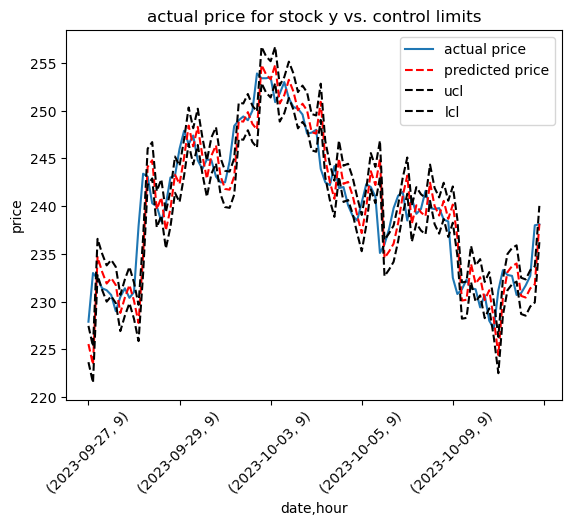

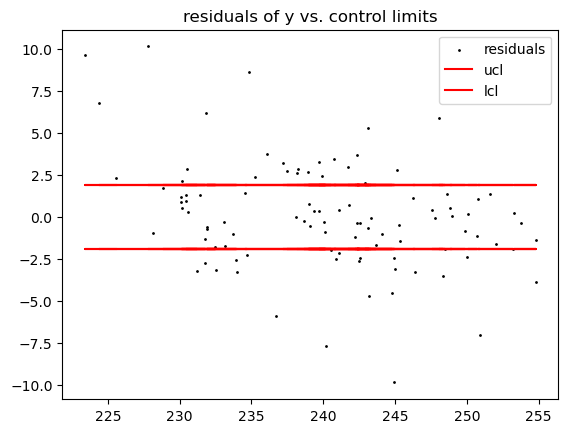

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-10 and test days 2023-10-11 => 2023-10-24
****************************************************************************


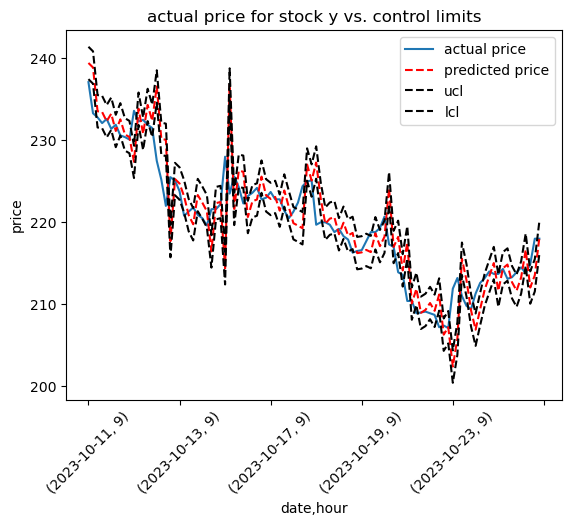

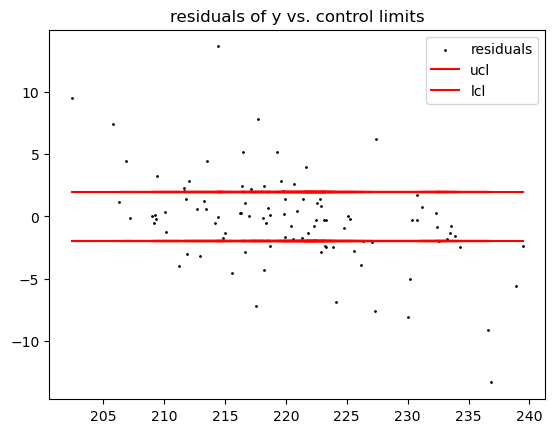

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-24 and test days 2023-10-25 => 2023-11-07
****************************************************************************


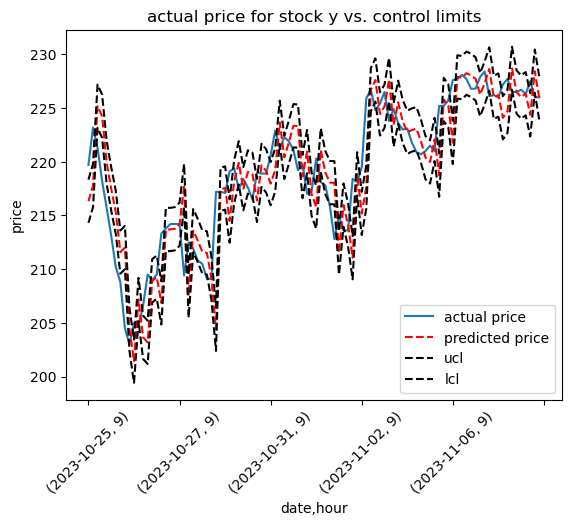

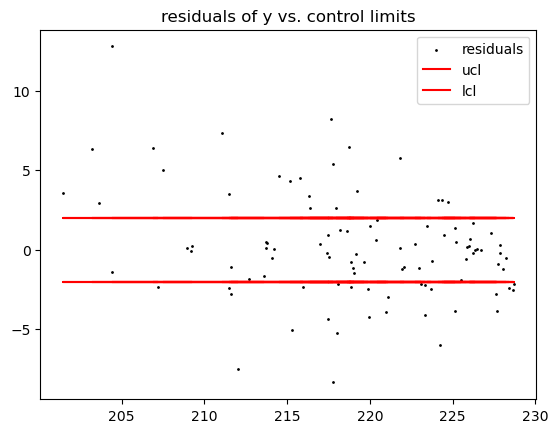

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-11-07 and test days 2023-11-08 => 2023-11-21
****************************************************************************


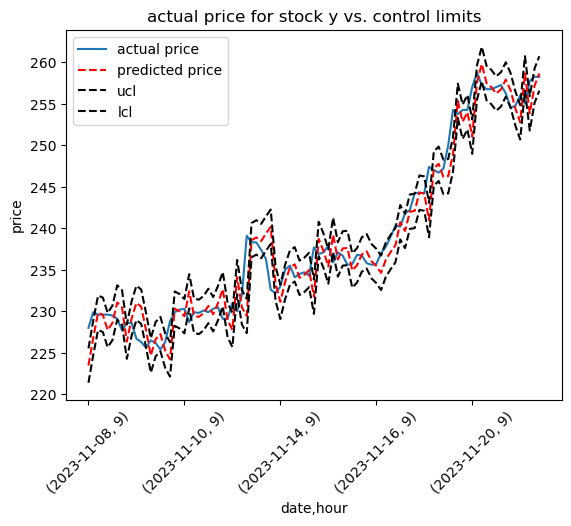

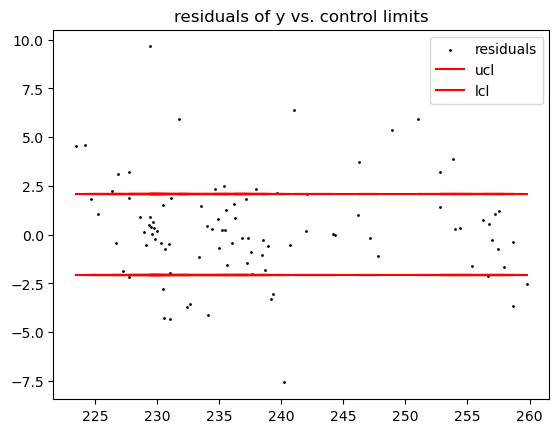

[1000,
 989.1973871427406,
 993.1550860352007,
 943.2067195868178,
 963.8754196506266,
 1010.9040598291953]

In [100]:
tsr = TimeSeriesRegression(name='time_series_model', k=3, arima_params={'x':(1,1,0), 'y':(1,1,0)})
data = df[['date', 'hour', 'PGSUS', 'THYAO']]
simulation = TradingSimulation(data=data, model=tsr)
simulation.backtest(plot=True)

The predictions are better compared to the linear model and therefore the residuals are much more stable, making the trading strategy more robust. Although the rate of return given by the linear model was higher, as discussed earlier, it seemt to be due to chance -at least partially. In this case, however, we owe the good performance to stationary residuals and hence a more robust method.

## AKBNK vs GARAN

In [101]:
#using auto_arima function to find the best model 
from pmdarima import auto_arima
np.random.seed(123)

column_to_model = 'AKBNK'

train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]

auto_model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

print(auto_model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.60 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14895.303, Time=1.20 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-19186.519, Time=0.76 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14897.303, Time=0.54 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-20956.976, Time=0.78 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-21722.671, Time=4.31 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-22379.927, Time=3.85 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-22764.033, Time=3.98 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-24211.278, Time=16.53 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-24385.887, Time=14.76 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.16 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.50 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.52 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept 

In [102]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
#for AKBNK
column_to_model = "AKBNK"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


model = ARIMA(train_data, order=(5,2,3))
fitted_model_akbnk = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_akbnk.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_akbnk = predictions.reset_index(drop=True)
predictions_reindexed_akbnk.index = test_data.index


residuals_akbnk = test_data - predictions_reindexed_akbnk

print("Residuals:\n", residuals_akbnk)


Residuals:
 timestamp
2023-09-12 09:00:00    0.040202
2023-09-12 10:00:00   -0.268427
2023-09-12 11:00:00   -0.695832
2023-09-12 12:00:00   -0.604218
2023-09-12 13:00:00   -0.411580
                         ...   
2023-11-21 09:00:00   -3.941290
2023-11-21 10:00:00   -4.149333
2023-11-21 11:00:00   -4.157377
2023-11-21 12:00:00   -4.145420
2023-11-21 13:00:00   -4.193463
Length: 505, dtype: float64


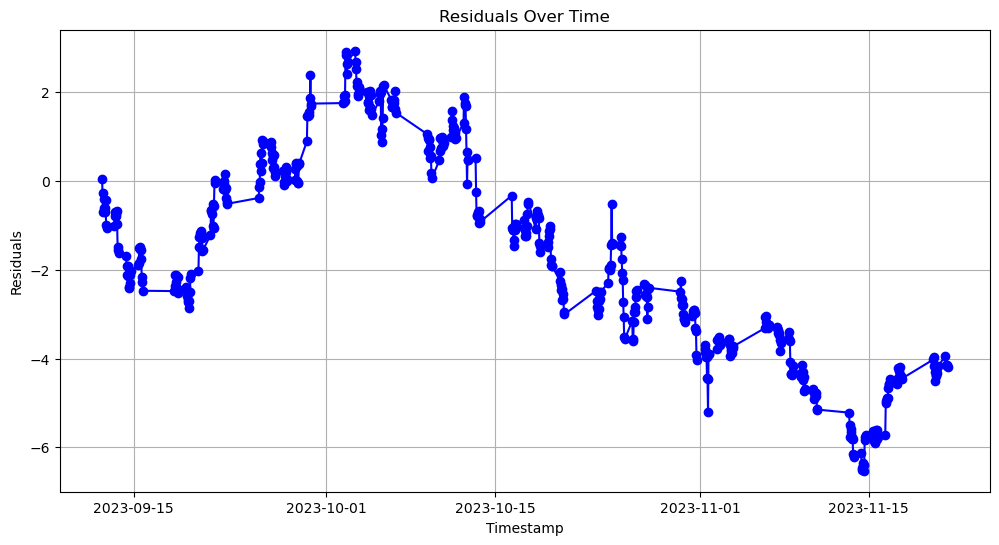

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_akbnk, color='blue', marker='o')
plt.title('Residuals Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [104]:
#as predictions and residuals from the parameters suggested by auto.arima seem to be working with data for AKBNK 
#we proceeded with this model

In [105]:
#using auto_arima function to find the best model for GARAN
from pmdarima import auto_arima
np.random.seed(123)

column_to_model = 'GARAN'

train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]

auto_model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-43.806, Time=1.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-4394.629, Time=0.67 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-45.806, Time=0.36 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-6217.603, Time=2.01 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-6942.252, Time=3.40 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-7616.615, Time=3.87 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-7960.756, Time=4.05 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-9859.450, Time=16.48 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.00 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.58 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=22.88 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=6.59 sec

Best model:  ARIMA(5,2,1)(0,0,0)[0] intercept
Total f

In [106]:
#for GARAN
column_to_model = "GARAN"
train_end = pd.Timestamp("2023-09-12")
mask = df.index <= train_end

train_data = df.loc[mask, column_to_model]
test_data = df.loc[~mask, column_to_model]


model = ARIMA(train_data, order=(5,2,1))
fitted_model_garan = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model_garan.predict(start=start, end=end, typ='levels')

#reindexing to have matching data
predictions_reindexed_garan = predictions.reset_index(drop=True)
predictions_reindexed_garan.index = test_data.index

residuals_garan = test_data - predictions_reindexed_garan

print("Residuals:\n", residuals_garan)



Residuals:
 timestamp
2023-09-12 09:00:00   -0.003765
2023-09-12 10:00:00   -0.417140
2023-09-12 11:00:00   -0.750179
2023-09-12 12:00:00   -0.718400
2023-09-12 13:00:00   -0.316351
                         ...   
2023-11-21 09:00:00   -7.315659
2023-11-21 10:00:00   -7.267922
2023-11-21 11:00:00   -7.580185
2023-11-21 12:00:00   -7.672448
2023-11-21 13:00:00   -7.784710
Length: 505, dtype: float64


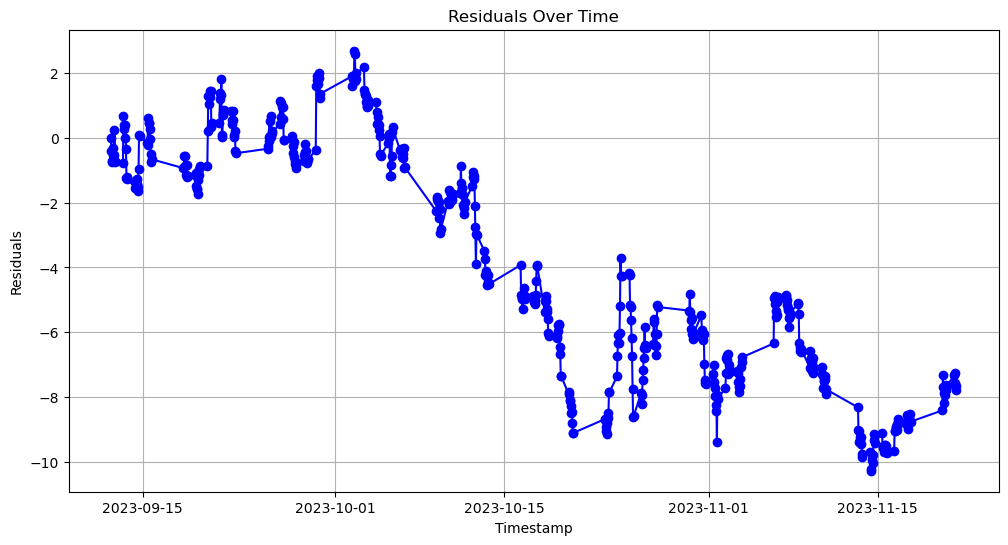

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_garan, color='blue', marker='o')
plt.title('Residuals Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [108]:
#as predictions and residuals from the parameters suggested by auto.arima seem to be working with data for GARAN 
#we proceeded with this model

All in all, we have the following parameter sets for ARIMA:
* AKBNK: (5,2,3)
* GARAN: (5,2,1)

Let us now analyze the relation between their residuals.

In [109]:
residuals_akb_grn = pd.DataFrame({'resid_AKBNK':residuals_akbnk, 'resid_GARAN':residuals_garan})
residuals_akb_grn

resid_AKBNK  resid_GARAN
timestamp                                    
2023-09-12 09:00:00     0.040202    -0.003765
2023-09-12 10:00:00    -0.268427    -0.417140
2023-09-12 11:00:00    -0.695832    -0.750179
2023-09-12 12:00:00    -0.604218    -0.718400
2023-09-12 13:00:00    -0.411580    -0.316351
...                          ...          ...
2023-11-21 09:00:00    -3.941290    -7.315659
2023-11-21 10:00:00    -4.149333    -7.267922
2023-11-21 11:00:00    -4.157377    -7.580185
2023-11-21 12:00:00    -4.145420    -7.672448
2023-11-21 13:00:00    -4.193463    -7.784710

[505 rows x 2 columns]

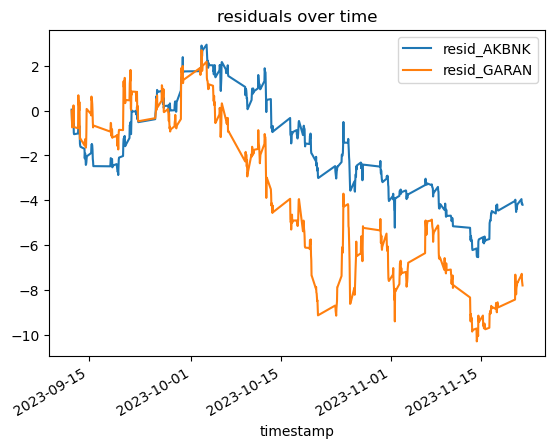

In [110]:
residuals_akb_grn[['resid_AKBNK', 'resid_GARAN']].plot()
plt.title('residuals over time')
plt.show()

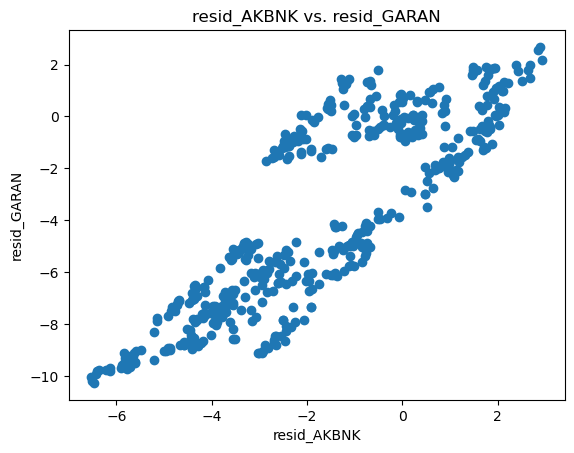

In [111]:
plt.scatter(residuals_akb_grn['resid_AKBNK'], residuals_akb_grn['resid_GARAN'])
plt.xlabel('resid_AKBNK')
plt.ylabel('resid_GARAN')
plt.title('resid_AKBNK vs. resid_GARAN')
plt.show()

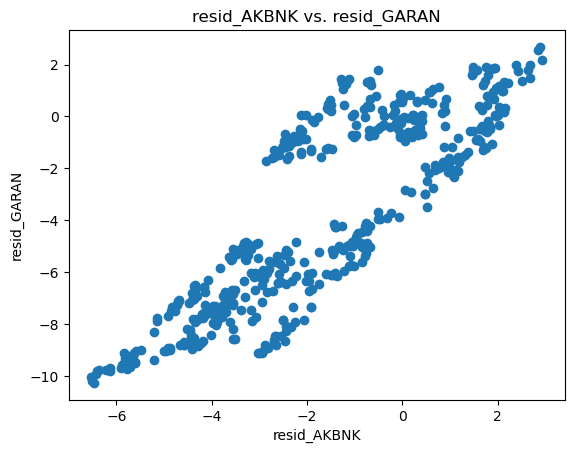

In [112]:
residuals_akb_grn_grouped = residuals_akb_grn.groupby('resid_AKBNK').mean().reset_index()
plt.scatter(residuals_akb_grn_grouped['resid_AKBNK'], residuals_akb_grn_grouped['resid_GARAN'])
plt.xlabel('resid_AKBNK')
plt.ylabel('resid_GARAN')
plt.title('resid_AKBNK vs. resid_GARAN')
plt.show()

Again, the relationship between resid_AKBNK an resid_GARAN is approximately linear.

In [113]:
# grid search for control chart parameter k 

for k in range(1, 5):
    tsr = TimeSeriesRegression(name='time_series_model', k=k, arima_params={'x':(5,2,3), 'y':(5,2,1)})
    data = df[['date', 'hour', 'AKBNK', 'GARAN']]
    simulation = TradingSimulation(data=data, model=tsr)
    print(k, simulation.backtest())

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 [1000, 1032.2604782521412, 1038.9824676562832, 1011.9637126603867, 1002.7963668037207, 999.1961815899717]


C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 [1000, 1028.0181928036757, 1042.327769928784, 1020.3298906087653, 1006.0331092841495, 1002.0354921884868]


C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 [1000, 1023.0672388267124, 1038.6528111391385, 1017.121649722084, 997.4139254769119, 996.674397429987]


C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 [1000, 1004.4527595278876, 1012.3007658201725, 998.8094455686394, 985.7136364565629, 986.7948298119031]


In [ ]:
# The k value that brings the greatest ror is 2. 
# RoR = 0.2%

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-12 and test days 2023-09-13 => 2023-09-26
****************************************************************************


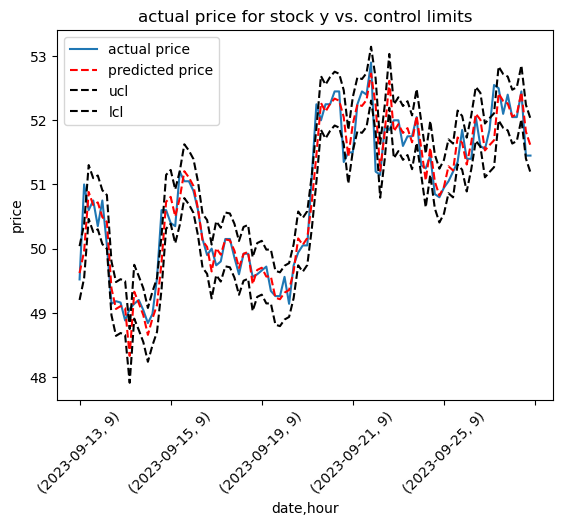

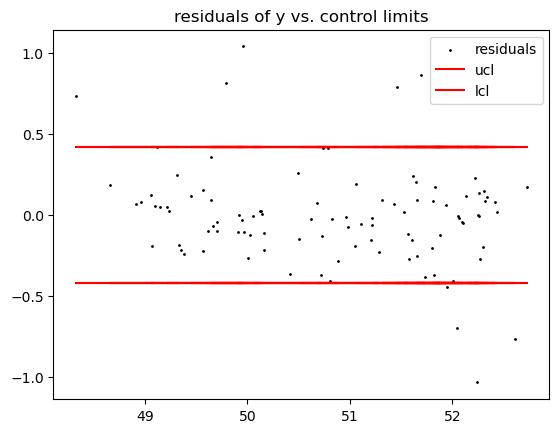

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-09-26 and test days 2023-09-27 => 2023-10-10
****************************************************************************


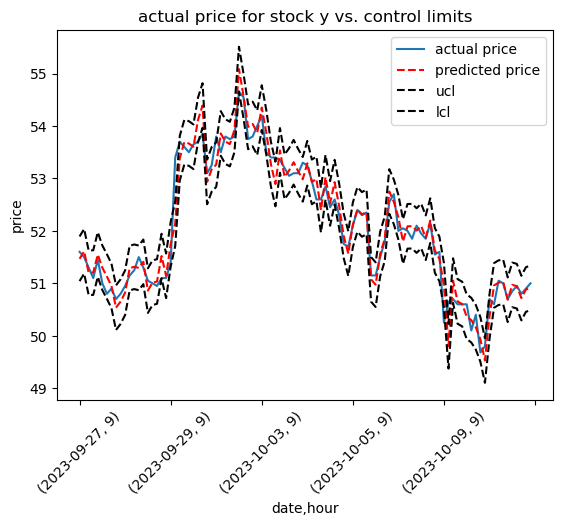

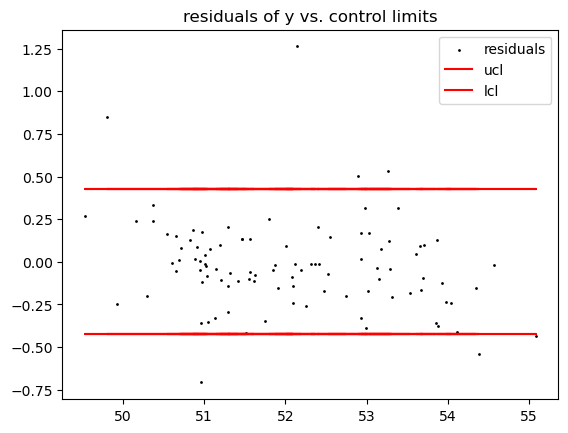

****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-10 and test days 2023-10-11 => 2023-10-24
****************************************************************************


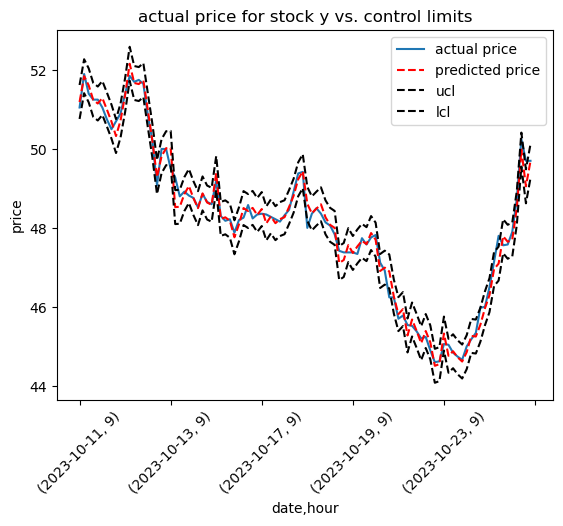

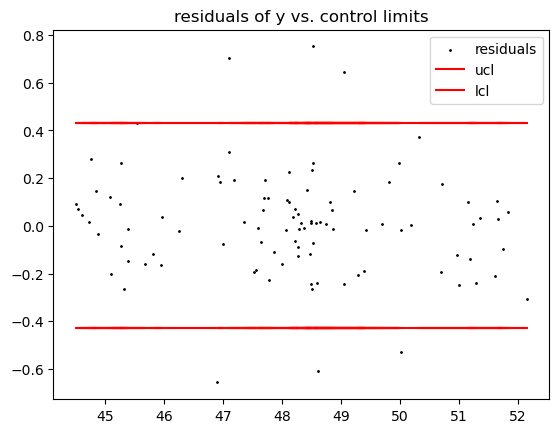

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************************************************
Siumulation for train days 2018-01-02 => 2023-10-24 and test days 2023-10-25 => 2023-11-07
****************************************************************************


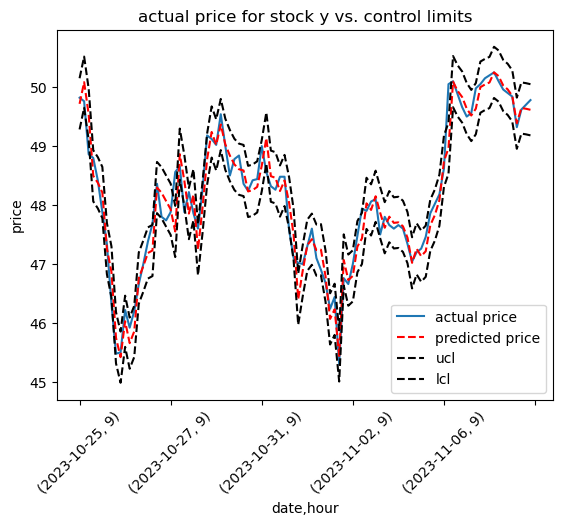

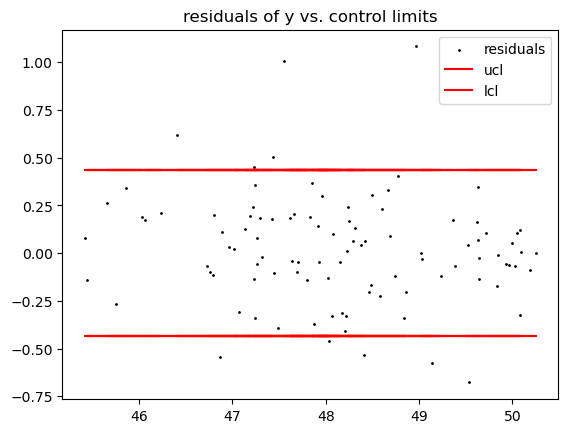

C:\Users\Excalibur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


****************************************************************************
Siumulation for train days 2018-01-02 => 2023-11-07 and test days 2023-11-08 => 2023-11-21
****************************************************************************


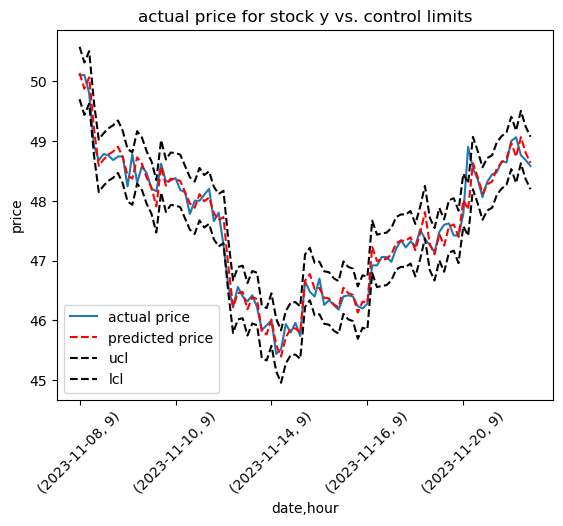

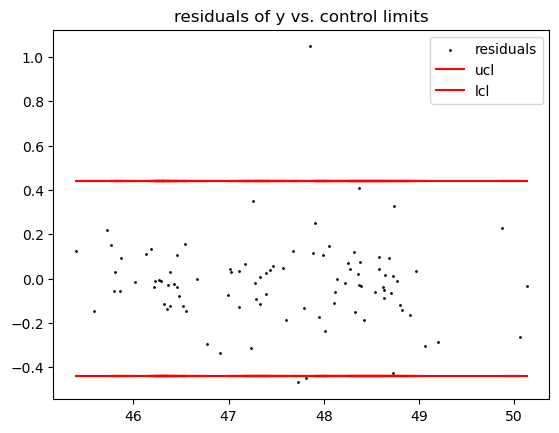

[1000,
 1028.0181928036757,
 1042.327769928784,
 1020.3298906087653,
 1006.0331092841495,
 1002.0354921884868]

In [115]:
tsr = TimeSeriesRegression(name='time_series_model', k=2, arima_params={'x':(5,2,3), 'y':(5,2,1)})
data = df[['date', 'hour', 'AKBNK', 'GARAN']]
simulation = TradingSimulation(data=data, model=tsr)
simulation.backtest(plot=True)

Though, the rate of return obtained by the setting with the linear model was higher than the one with the time series model, in here the predictions are better compared to the linear model as well and this time the model did not suffer from the shift in the relation between x and y. The time series model is seems to be more robust and if a longer test period was selected, it may have outperformed its linear regression counterpart. The overall residuals seem to be stationary for each simulation period and many of them fall within the control chart limits as expected. 

All in all, for both Akbank - Garanti and Pegasus - Turkish Airlines cases, we judge it to be more reasonable to employ the settings with the time series models. 

A limitation of this implementation of time series models is that we do not consider changing the ARIMA hyperparameters at each simulation step. We choose one parameter setting per time series model (one for x and one for y) depending on the analysis on the train data, and we use those parameters throughout the simulation. Only the learnable model parameters are changed by retraining during the simulation. An important reason for this is that the other approach requires an automated hyperparameter search method for which we tried auto arima yet did not found it sufficienlt good. 

Another limitation for both methods is that we trade everytime we detect a tradig signal. That is, for instance, if the y series is out of bounds for a given time t, it is likely to be out of bounds for the following times -say t+1 and t+2- as well. In such a case, it would be reasonable to trade at only one of those times but we trade at each of them as we do not check the previous transactions we made while considering a trade option.

# Conclusion

All in all, when combined with suitable predictive models to analyze the relationship between stock pairs, pairs trading is a promising strategy for trading. We have used simple linear regression and a hybrid model combining arima and linear regression to model the relationship. Then we simulated the strategies to analyze them. Here are the parameters of the simulation:
* number of days each simulation period consists of: 10
* number of simulation periods: 5
* initial balance: 1000
* trade proportion: 0.1

Although the simple linear regression models gave higher rate of return values in a simulation of 5 periods with each period consisting of 10 days, we analyzed the plots to better understand the decision procedure of the models and concluded that they are not robust, their high rate of return values are not due to their merits to a large extend. Hybrid time series models, on the other hand, gave lower yet still quite high rate of return but more importantly, they were more robust. The simulations should be run for different parameter settings and perhaps with different trade strategies (like trading different proportions depending on the situation, unlike the way we adopted here) to arrive at a strong conclusion but with all the analyses we carried out here, it can be said that the hybrid time series models described previously are good potentials for pairs trading.